In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
  #  for filename in filenames:
   #     print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df = pd.read_csv('../input/colcofi-preprocessing/prepared_data.csv')

In [ ]:
df.shape

(817509, 41)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817509 entries, 0 to 817508
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        817509 non-null  int64  
 1   Depth                             817509 non-null  float64
 2   Temperature                       817509 non-null  float64
 3   Salinity                          817509 non-null  float64
 4   O2_mL/L                           817509 non-null  float64
 5   H2O Density                       817509 non-null  float64
 6   O2 Sat                            817509 non-null  float64
 7   O2_µmol/Kg                        817509 non-null  float64
 8   Phosphate Concentration           817509 non-null  float64
 9   Silicate Concentration            817509 non-null  float64
 10  Nitrite Concentration             817509 non-null  float64
 11  Nitrate Concentration             817509 non-null  f

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
X = df.drop(['Salinity','Reported Salinity'], axis=1)
y = df['Salinity']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import seaborn as sns


In [ ]:
import matplotlib.pyplot as plt

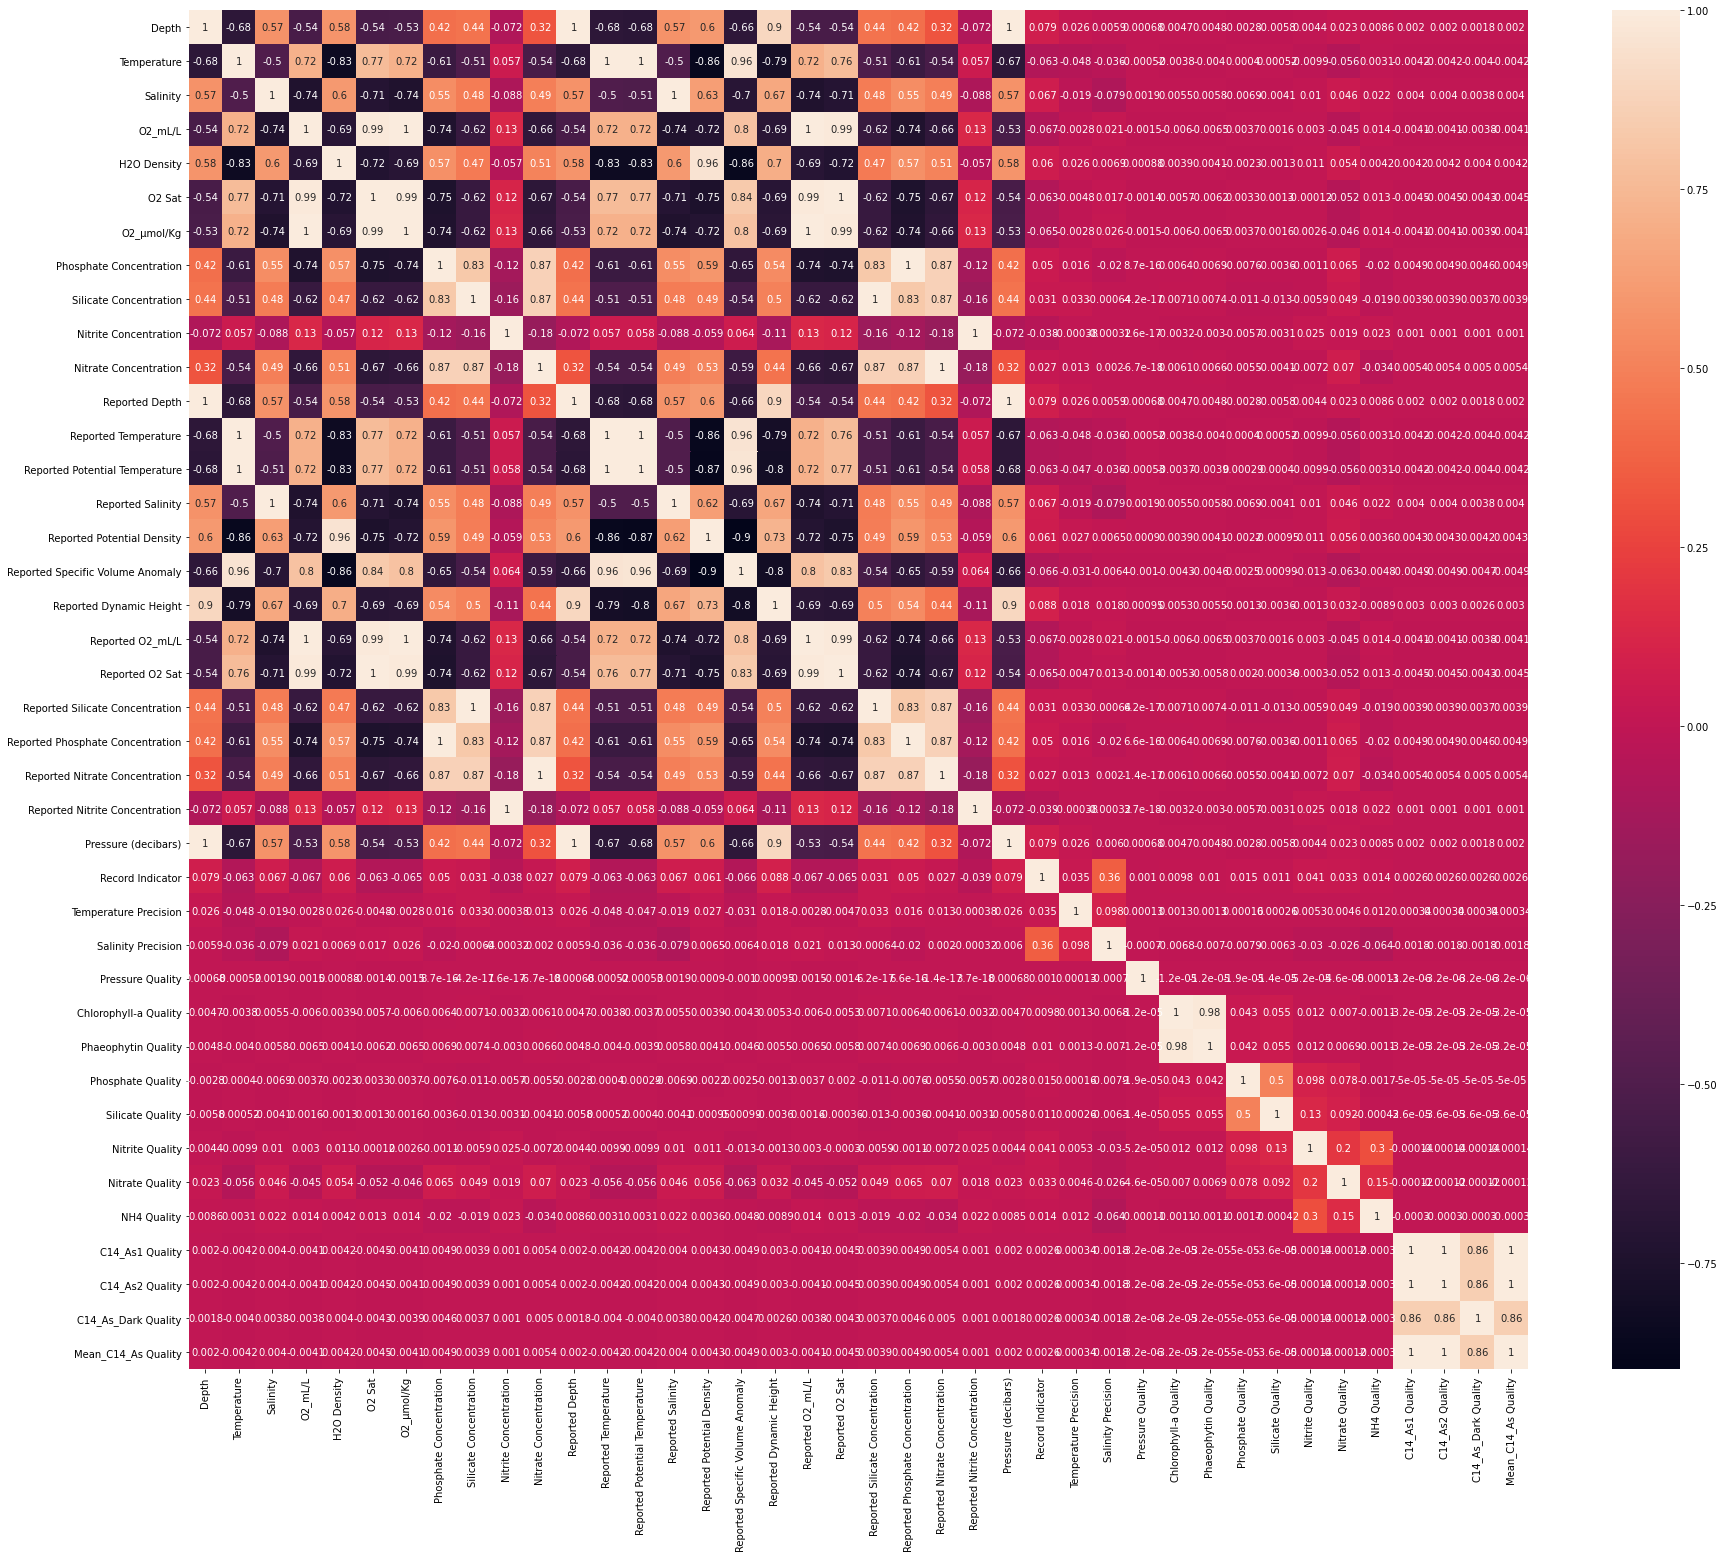

In [ ]:
plt.figure(figsize= (30,25))
sns.heatmap(df.corr(), annot=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
def model(algo):
    model = algo.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = model.score(X_train, y_train)
    
    score = r2_score(y_test, y_pred)
    
    MAE = mean_absolute_error(y_test, y_pred)
    
    MSE = mean_squared_error(y_test, y_pred)
    
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f'The accuracy on training set is {accuracy}')
    print('')
    print(f'The accuracy on test set is {score}')
    print('')
    print(f'The mean absolute error is {MAE}')
    print('')
    print(f'The mean squared error is {MSE}')
    print('')
    print(f'The root mean squared error is {RMSE}')
    

rom sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
bg = BaggingRegressor()
ada = AdaBoostRegressor()
grbt = GradientBoostingRegressor()
xgb = XGBRegressor(tree_method ='gpu_hist', gpu_id= 0, verbosity =0,)
xgbf = XGBRFRegressor()
lgb = LGBMRegressor()
cat = CatBoostRegressor(task_type='GPU', verbose=0)

In [ ]:
model(lr)

The accuracy on training set is 0.9562203102372764

The accuracy on test set is 0.9566595437120469

The mean absolute error is 0.006284424787366395

The mean squared error is 0.00012509106812454634

The root mean squared error is 0.011184411836325875


In [ ]:
model(dt)

The accuracy on training set is 0.9997274888754822

The accuracy on test set is 0.9968399596484222

The mean absolute error is 0.0006292768097999563

The mean squared error is 9.12064285316278e-06

The root mean squared error is 0.003020040207209629


In [ ]:
model(rf)

The accuracy on training set is 0.9994430552575514

The accuracy on test set is 0.9983393819056507

The mean absolute error is 0.0003187228129190829

The mean squared error is 4.792946566804689e-06

The root mean squared error is 0.002189279919700697


In [ ]:
model(cat)

The accuracy on training set is 0.9893509069991143

The accuracy on test set is 0.98971056249629

The mean absolute error is 0.003075625259660044

The mean squared error is 2.9697812113196807e-05

The root mean squared error is 0.005449569901670847


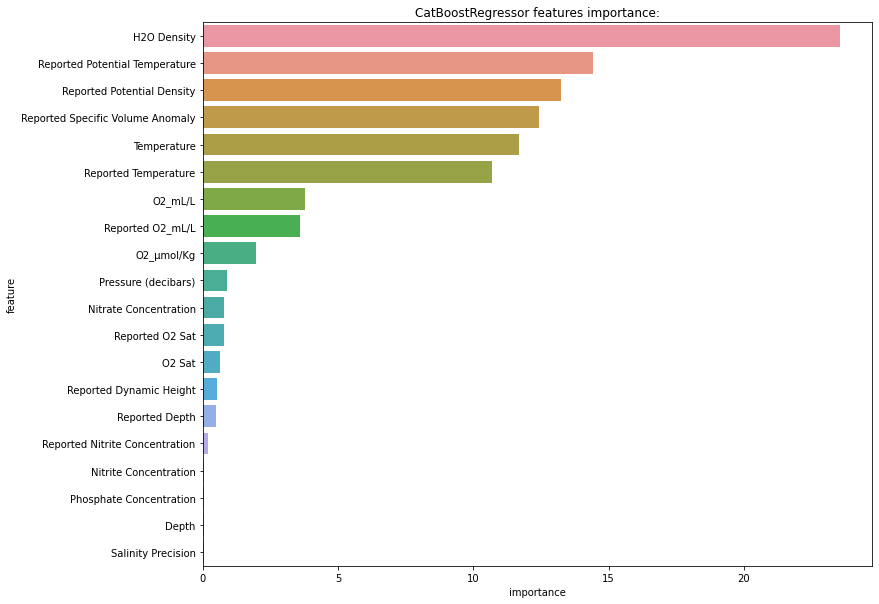

In [ ]:
feature_importance_df = pd.DataFrame(cat.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(20))
plt.title('CatBoostRegressor features importance:');

In [ ]:
model(xgb)

The accuracy on training set is 0.9947710532090606

The accuracy on test set is 0.9945330098771634

The mean absolute error is 0.0020237931880509106

The mean squared error is 1.5779059393107056e-05

The root mean squared error is 0.003972286418815624


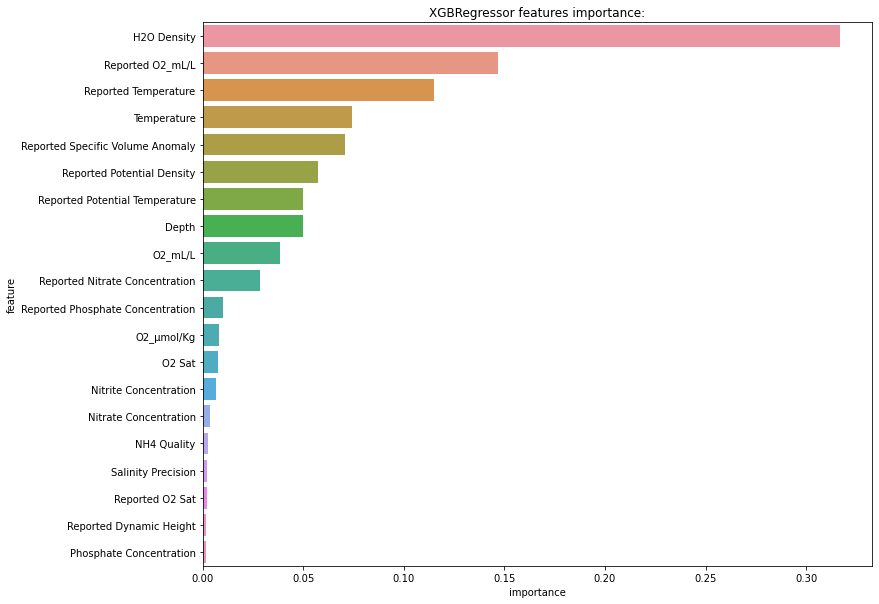

In [ ]:
feature_importance_df = pd.DataFrame(xgb.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(25))
plt.title('XGBRegressor features importance:');


In [ ]:
model(ada)

The accuracy on training set is 0.7067592941757459

The accuracy on test set is 0.7077174230689249

The mean absolute error is 0.022273266426894693

The mean squared error is 0.0008435984037543635

The root mean squared error is 0.029044765513847128


In [ ]:
cross_val_score(cat, X, y, cv=10, scoring='r2').mean() #0.9922400812668599

Learning rate set to 0.12638
0:	learn: 0.0481930	total: 147ms	remaining: 2m 26s
1:	learn: 0.0443246	total: 268ms	remaining: 2m 13s
2:	learn: 0.0409477	total: 377ms	remaining: 2m 5s
3:	learn: 0.0381311	total: 491ms	remaining: 2m 2s
4:	learn: 0.0353234	total: 620ms	remaining: 2m 3s
5:	learn: 0.0329753	total: 731ms	remaining: 2m 1s
6:	learn: 0.0308848	total: 857ms	remaining: 2m 1s
7:	learn: 0.0291157	total: 979ms	remaining: 2m 1s
8:	learn: 0.0275999	total: 1.08s	remaining: 1m 58s
9:	learn: 0.0261446	total: 1.18s	remaining: 1m 57s
10:	learn: 0.0249131	total: 1.3s	remaining: 1m 57s
11:	learn: 0.0239188	total: 1.42s	remaining: 1m 56s
12:	learn: 0.0229715	total: 1.52s	remaining: 1m 55s
13:	learn: 0.0219599	total: 1.64s	remaining: 1m 55s
14:	learn: 0.0212622	total: 1.75s	remaining: 1m 54s
15:	learn: 0.0205632	total: 1.85s	remaining: 1m 54s
16:	learn: 0.0197080	total: 1.97s	remaining: 1m 53s
17:	learn: 0.0190006	total: 2.06s	remaining: 1m 52s
18:	learn: 0.0184490	total: 2.15s	remaining: 1m 51s


158:	learn: 0.0050182	total: 17.7s	remaining: 1m 33s
159:	learn: 0.0050067	total: 17.9s	remaining: 1m 33s
160:	learn: 0.0049969	total: 18s	remaining: 1m 34s
161:	learn: 0.0049813	total: 18.2s	remaining: 1m 34s
162:	learn: 0.0049696	total: 18.3s	remaining: 1m 34s
163:	learn: 0.0049494	total: 18.4s	remaining: 1m 33s
164:	learn: 0.0049363	total: 18.5s	remaining: 1m 33s
165:	learn: 0.0049229	total: 18.6s	remaining: 1m 33s
166:	learn: 0.0049092	total: 18.8s	remaining: 1m 33s
167:	learn: 0.0048947	total: 18.9s	remaining: 1m 33s
168:	learn: 0.0048837	total: 19s	remaining: 1m 33s
169:	learn: 0.0048697	total: 19.1s	remaining: 1m 33s
170:	learn: 0.0048590	total: 19.2s	remaining: 1m 33s
171:	learn: 0.0048389	total: 19.3s	remaining: 1m 32s
172:	learn: 0.0048272	total: 19.5s	remaining: 1m 32s
173:	learn: 0.0048170	total: 19.6s	remaining: 1m 32s
174:	learn: 0.0047977	total: 19.7s	remaining: 1m 32s
175:	learn: 0.0047874	total: 19.8s	remaining: 1m 32s
176:	learn: 0.0047745	total: 19.9s	remaining: 1m 3

315:	learn: 0.0038853	total: 34.8s	remaining: 1m 15s
316:	learn: 0.0038819	total: 34.9s	remaining: 1m 15s
317:	learn: 0.0038779	total: 35s	remaining: 1m 15s
318:	learn: 0.0038748	total: 35.1s	remaining: 1m 15s
319:	learn: 0.0038711	total: 35.2s	remaining: 1m 14s
320:	learn: 0.0038668	total: 35.3s	remaining: 1m 14s
321:	learn: 0.0038626	total: 35.4s	remaining: 1m 14s
322:	learn: 0.0038593	total: 35.5s	remaining: 1m 14s
323:	learn: 0.0038545	total: 35.6s	remaining: 1m 14s
324:	learn: 0.0038519	total: 35.7s	remaining: 1m 14s
325:	learn: 0.0038499	total: 35.8s	remaining: 1m 14s
326:	learn: 0.0038471	total: 35.9s	remaining: 1m 13s
327:	learn: 0.0038443	total: 36s	remaining: 1m 13s
328:	learn: 0.0038406	total: 36.1s	remaining: 1m 13s
329:	learn: 0.0038362	total: 36.2s	remaining: 1m 13s
330:	learn: 0.0038333	total: 36.3s	remaining: 1m 13s
331:	learn: 0.0038312	total: 36.4s	remaining: 1m 13s
332:	learn: 0.0038260	total: 36.5s	remaining: 1m 13s
333:	learn: 0.0038216	total: 36.6s	remaining: 1m 1

474:	learn: 0.0034739	total: 52.2s	remaining: 57.7s
475:	learn: 0.0034729	total: 52.3s	remaining: 57.6s
476:	learn: 0.0034688	total: 52.4s	remaining: 57.5s
477:	learn: 0.0034675	total: 52.5s	remaining: 57.4s
478:	learn: 0.0034657	total: 52.6s	remaining: 57.3s
479:	learn: 0.0034642	total: 52.8s	remaining: 57.2s
480:	learn: 0.0034634	total: 52.8s	remaining: 57s
481:	learn: 0.0034627	total: 52.9s	remaining: 56.9s
482:	learn: 0.0034606	total: 53s	remaining: 56.8s
483:	learn: 0.0034578	total: 53.2s	remaining: 56.7s
484:	learn: 0.0034565	total: 53.3s	remaining: 56.6s
485:	learn: 0.0034551	total: 53.4s	remaining: 56.5s
486:	learn: 0.0034542	total: 53.5s	remaining: 56.3s
487:	learn: 0.0034524	total: 53.6s	remaining: 56.2s
488:	learn: 0.0034509	total: 53.7s	remaining: 56.1s
489:	learn: 0.0034495	total: 53.8s	remaining: 56s
490:	learn: 0.0034473	total: 54s	remaining: 56s
491:	learn: 0.0034457	total: 54.2s	remaining: 55.9s
492:	learn: 0.0034443	total: 54.3s	remaining: 55.8s
493:	learn: 0.0034430	

635:	learn: 0.0032303	total: 1m 10s	remaining: 40.1s
636:	learn: 0.0032293	total: 1m 10s	remaining: 40s
637:	learn: 0.0032282	total: 1m 10s	remaining: 39.9s
638:	learn: 0.0032262	total: 1m 10s	remaining: 39.8s
639:	learn: 0.0032252	total: 1m 10s	remaining: 39.7s
640:	learn: 0.0032238	total: 1m 10s	remaining: 39.6s
641:	learn: 0.0032216	total: 1m 10s	remaining: 39.4s
642:	learn: 0.0032208	total: 1m 10s	remaining: 39.3s
643:	learn: 0.0032167	total: 1m 10s	remaining: 39.2s
644:	learn: 0.0032156	total: 1m 11s	remaining: 39.1s
645:	learn: 0.0032145	total: 1m 11s	remaining: 39s
646:	learn: 0.0032139	total: 1m 11s	remaining: 38.9s
647:	learn: 0.0032131	total: 1m 11s	remaining: 38.8s
648:	learn: 0.0032108	total: 1m 11s	remaining: 38.7s
649:	learn: 0.0032099	total: 1m 11s	remaining: 38.6s
650:	learn: 0.0032089	total: 1m 11s	remaining: 38.5s
651:	learn: 0.0032081	total: 1m 11s	remaining: 38.4s
652:	learn: 0.0032069	total: 1m 12s	remaining: 38.3s
653:	learn: 0.0032041	total: 1m 12s	remaining: 38.

792:	learn: 0.0030552	total: 1m 27s	remaining: 23s
793:	learn: 0.0030537	total: 1m 28s	remaining: 22.9s
794:	learn: 0.0030524	total: 1m 28s	remaining: 22.7s
795:	learn: 0.0030519	total: 1m 28s	remaining: 22.6s
796:	learn: 0.0030514	total: 1m 28s	remaining: 22.5s
797:	learn: 0.0030487	total: 1m 28s	remaining: 22.4s
798:	learn: 0.0030479	total: 1m 28s	remaining: 22.3s
799:	learn: 0.0030473	total: 1m 28s	remaining: 22.2s
800:	learn: 0.0030468	total: 1m 28s	remaining: 22.1s
801:	learn: 0.0030461	total: 1m 28s	remaining: 22s
802:	learn: 0.0030456	total: 1m 29s	remaining: 21.8s
803:	learn: 0.0030450	total: 1m 29s	remaining: 21.7s
804:	learn: 0.0030443	total: 1m 29s	remaining: 21.6s
805:	learn: 0.0030439	total: 1m 29s	remaining: 21.5s
806:	learn: 0.0030429	total: 1m 29s	remaining: 21.4s
807:	learn: 0.0030426	total: 1m 29s	remaining: 21.3s
808:	learn: 0.0030423	total: 1m 29s	remaining: 21.2s
809:	learn: 0.0030402	total: 1m 29s	remaining: 21.1s
810:	learn: 0.0030395	total: 1m 29s	remaining: 20.

948:	learn: 0.0029027	total: 1m 44s	remaining: 5.61s
949:	learn: 0.0029018	total: 1m 44s	remaining: 5.5s
950:	learn: 0.0029002	total: 1m 44s	remaining: 5.39s
951:	learn: 0.0028983	total: 1m 44s	remaining: 5.28s
952:	learn: 0.0028977	total: 1m 44s	remaining: 5.17s
953:	learn: 0.0028972	total: 1m 44s	remaining: 5.06s
954:	learn: 0.0028970	total: 1m 45s	remaining: 4.95s
955:	learn: 0.0028968	total: 1m 45s	remaining: 4.84s
956:	learn: 0.0028958	total: 1m 45s	remaining: 4.73s
957:	learn: 0.0028955	total: 1m 45s	remaining: 4.62s
958:	learn: 0.0028943	total: 1m 45s	remaining: 4.5s
959:	learn: 0.0028937	total: 1m 45s	remaining: 4.39s
960:	learn: 0.0028933	total: 1m 45s	remaining: 4.29s
961:	learn: 0.0028903	total: 1m 45s	remaining: 4.17s
962:	learn: 0.0028898	total: 1m 45s	remaining: 4.07s
963:	learn: 0.0028892	total: 1m 45s	remaining: 3.96s
964:	learn: 0.0028887	total: 1m 46s	remaining: 3.85s
965:	learn: 0.0028877	total: 1m 46s	remaining: 3.74s
966:	learn: 0.0028873	total: 1m 46s	remaining: 3

105:	learn: 0.0063831	total: 11.6s	remaining: 1m 38s
106:	learn: 0.0063475	total: 11.7s	remaining: 1m 37s
107:	learn: 0.0063080	total: 11.9s	remaining: 1m 38s
108:	learn: 0.0062801	total: 12s	remaining: 1m 37s
109:	learn: 0.0062500	total: 12.1s	remaining: 1m 37s
110:	learn: 0.0062089	total: 12.2s	remaining: 1m 37s
111:	learn: 0.0061860	total: 12.3s	remaining: 1m 37s
112:	learn: 0.0061473	total: 12.4s	remaining: 1m 37s
113:	learn: 0.0061264	total: 12.5s	remaining: 1m 37s
114:	learn: 0.0060952	total: 12.6s	remaining: 1m 36s
115:	learn: 0.0060644	total: 12.7s	remaining: 1m 36s
116:	learn: 0.0060363	total: 12.8s	remaining: 1m 36s
117:	learn: 0.0060084	total: 12.9s	remaining: 1m 36s
118:	learn: 0.0059800	total: 13s	remaining: 1m 36s
119:	learn: 0.0059566	total: 13.1s	remaining: 1m 36s
120:	learn: 0.0059307	total: 13.2s	remaining: 1m 36s
121:	learn: 0.0059050	total: 13.4s	remaining: 1m 36s
122:	learn: 0.0058829	total: 13.4s	remaining: 1m 35s
123:	learn: 0.0058548	total: 13.6s	remaining: 1m 3

261:	learn: 0.0044024	total: 29.5s	remaining: 1m 23s
262:	learn: 0.0043985	total: 29.6s	remaining: 1m 22s
263:	learn: 0.0043932	total: 29.7s	remaining: 1m 22s
264:	learn: 0.0043869	total: 29.8s	remaining: 1m 22s
265:	learn: 0.0043806	total: 29.9s	remaining: 1m 22s
266:	learn: 0.0043778	total: 30s	remaining: 1m 22s
267:	learn: 0.0043743	total: 30.1s	remaining: 1m 22s
268:	learn: 0.0043715	total: 30.2s	remaining: 1m 22s
269:	learn: 0.0043662	total: 30.3s	remaining: 1m 21s
270:	learn: 0.0043590	total: 30.4s	remaining: 1m 21s
271:	learn: 0.0043536	total: 30.5s	remaining: 1m 21s
272:	learn: 0.0043498	total: 30.7s	remaining: 1m 21s
273:	learn: 0.0043441	total: 30.8s	remaining: 1m 21s
274:	learn: 0.0043417	total: 30.9s	remaining: 1m 21s
275:	learn: 0.0043360	total: 31s	remaining: 1m 21s
276:	learn: 0.0043310	total: 31.1s	remaining: 1m 21s
277:	learn: 0.0043289	total: 31.2s	remaining: 1m 21s
278:	learn: 0.0043249	total: 31.3s	remaining: 1m 20s
279:	learn: 0.0043139	total: 31.4s	remaining: 1m 2

417:	learn: 0.0038675	total: 46.6s	remaining: 1m 4s
418:	learn: 0.0038668	total: 46.7s	remaining: 1m 4s
419:	learn: 0.0038646	total: 46.8s	remaining: 1m 4s
420:	learn: 0.0038615	total: 46.9s	remaining: 1m 4s
421:	learn: 0.0038596	total: 47s	remaining: 1m 4s
422:	learn: 0.0038567	total: 47.2s	remaining: 1m 4s
423:	learn: 0.0038556	total: 47.3s	remaining: 1m 4s
424:	learn: 0.0038535	total: 47.4s	remaining: 1m 4s
425:	learn: 0.0038515	total: 47.5s	remaining: 1m 3s
426:	learn: 0.0038493	total: 47.6s	remaining: 1m 3s
427:	learn: 0.0038464	total: 47.7s	remaining: 1m 3s
428:	learn: 0.0038446	total: 47.8s	remaining: 1m 3s
429:	learn: 0.0038436	total: 47.9s	remaining: 1m 3s
430:	learn: 0.0038413	total: 48s	remaining: 1m 3s
431:	learn: 0.0038393	total: 48.1s	remaining: 1m 3s
432:	learn: 0.0038376	total: 48.2s	remaining: 1m 3s
433:	learn: 0.0038356	total: 48.4s	remaining: 1m 3s
434:	learn: 0.0038306	total: 48.5s	remaining: 1m 2s
435:	learn: 0.0038287	total: 48.6s	remaining: 1m 2s
436:	learn: 0.00

577:	learn: 0.0035512	total: 1m 4s	remaining: 47s
578:	learn: 0.0035498	total: 1m 4s	remaining: 46.9s
579:	learn: 0.0035488	total: 1m 4s	remaining: 46.8s
580:	learn: 0.0035475	total: 1m 4s	remaining: 46.7s
581:	learn: 0.0035468	total: 1m 4s	remaining: 46.5s
582:	learn: 0.0035459	total: 1m 4s	remaining: 46.5s
583:	learn: 0.0035401	total: 1m 5s	remaining: 46.3s
584:	learn: 0.0035360	total: 1m 5s	remaining: 46.2s
585:	learn: 0.0035349	total: 1m 5s	remaining: 46.1s
586:	learn: 0.0035339	total: 1m 5s	remaining: 46s
587:	learn: 0.0035327	total: 1m 5s	remaining: 45.9s
588:	learn: 0.0035317	total: 1m 5s	remaining: 45.8s
589:	learn: 0.0035306	total: 1m 5s	remaining: 45.7s
590:	learn: 0.0035291	total: 1m 5s	remaining: 45.5s
591:	learn: 0.0035286	total: 1m 5s	remaining: 45.4s
592:	learn: 0.0035276	total: 1m 6s	remaining: 45.3s
593:	learn: 0.0035270	total: 1m 6s	remaining: 45.2s
594:	learn: 0.0035260	total: 1m 6s	remaining: 45.1s
595:	learn: 0.0035251	total: 1m 6s	remaining: 45s
596:	learn: 0.0035

735:	learn: 0.0033494	total: 1m 22s	remaining: 29.5s
736:	learn: 0.0033489	total: 1m 22s	remaining: 29.4s
737:	learn: 0.0033482	total: 1m 22s	remaining: 29.3s
738:	learn: 0.0033475	total: 1m 22s	remaining: 29.2s
739:	learn: 0.0033471	total: 1m 22s	remaining: 29.1s
740:	learn: 0.0033454	total: 1m 22s	remaining: 29s
741:	learn: 0.0033435	total: 1m 23s	remaining: 28.9s
742:	learn: 0.0033425	total: 1m 23s	remaining: 28.8s
743:	learn: 0.0033418	total: 1m 23s	remaining: 28.7s
744:	learn: 0.0033415	total: 1m 23s	remaining: 28.6s
745:	learn: 0.0033409	total: 1m 23s	remaining: 28.5s
746:	learn: 0.0033402	total: 1m 23s	remaining: 28.3s
747:	learn: 0.0033398	total: 1m 23s	remaining: 28.2s
748:	learn: 0.0033391	total: 1m 23s	remaining: 28.1s
749:	learn: 0.0033357	total: 1m 23s	remaining: 28s
750:	learn: 0.0033352	total: 1m 24s	remaining: 27.9s
751:	learn: 0.0033346	total: 1m 24s	remaining: 27.8s
752:	learn: 0.0033339	total: 1m 24s	remaining: 27.6s
753:	learn: 0.0033328	total: 1m 24s	remaining: 27.

891:	learn: 0.0032056	total: 1m 39s	remaining: 12.1s
892:	learn: 0.0032047	total: 1m 39s	remaining: 12s
893:	learn: 0.0032018	total: 1m 40s	remaining: 11.9s
894:	learn: 0.0031989	total: 1m 40s	remaining: 11.7s
895:	learn: 0.0031977	total: 1m 40s	remaining: 11.6s
896:	learn: 0.0031971	total: 1m 40s	remaining: 11.5s
897:	learn: 0.0031966	total: 1m 40s	remaining: 11.4s
898:	learn: 0.0031955	total: 1m 40s	remaining: 11.3s
899:	learn: 0.0031949	total: 1m 40s	remaining: 11.2s
900:	learn: 0.0031906	total: 1m 40s	remaining: 11.1s
901:	learn: 0.0031898	total: 1m 40s	remaining: 11s
902:	learn: 0.0031895	total: 1m 41s	remaining: 10.9s
903:	learn: 0.0031881	total: 1m 41s	remaining: 10.7s
904:	learn: 0.0031876	total: 1m 41s	remaining: 10.6s
905:	learn: 0.0031873	total: 1m 41s	remaining: 10.5s
906:	learn: 0.0031864	total: 1m 41s	remaining: 10.4s
907:	learn: 0.0031861	total: 1m 41s	remaining: 10.3s
908:	learn: 0.0031855	total: 1m 41s	remaining: 10.2s
909:	learn: 0.0031846	total: 1m 41s	remaining: 10.

49:	learn: 0.0101035	total: 5.25s	remaining: 1m 39s
50:	learn: 0.0099247	total: 5.36s	remaining: 1m 39s
51:	learn: 0.0098366	total: 5.45s	remaining: 1m 39s
52:	learn: 0.0097451	total: 5.54s	remaining: 1m 39s
53:	learn: 0.0095918	total: 5.67s	remaining: 1m 39s
54:	learn: 0.0094364	total: 5.79s	remaining: 1m 39s
55:	learn: 0.0093142	total: 5.89s	remaining: 1m 39s
56:	learn: 0.0091766	total: 6s	remaining: 1m 39s
57:	learn: 0.0091004	total: 6.08s	remaining: 1m 38s
58:	learn: 0.0089475	total: 6.22s	remaining: 1m 39s
59:	learn: 0.0088613	total: 6.32s	remaining: 1m 39s
60:	learn: 0.0087476	total: 6.45s	remaining: 1m 39s
61:	learn: 0.0086317	total: 6.57s	remaining: 1m 39s
62:	learn: 0.0085512	total: 6.7s	remaining: 1m 39s
63:	learn: 0.0084589	total: 6.85s	remaining: 1m 40s
64:	learn: 0.0083475	total: 6.96s	remaining: 1m 40s
65:	learn: 0.0082533	total: 7.06s	remaining: 1m 39s
66:	learn: 0.0081605	total: 7.18s	remaining: 1m 39s
67:	learn: 0.0080787	total: 7.28s	remaining: 1m 39s
68:	learn: 0.007

206:	learn: 0.0045398	total: 22.3s	remaining: 1m 25s
207:	learn: 0.0045316	total: 22.4s	remaining: 1m 25s
208:	learn: 0.0045273	total: 22.5s	remaining: 1m 25s
209:	learn: 0.0045237	total: 22.6s	remaining: 1m 24s
210:	learn: 0.0045165	total: 22.7s	remaining: 1m 24s
211:	learn: 0.0045111	total: 22.8s	remaining: 1m 24s
212:	learn: 0.0045017	total: 22.9s	remaining: 1m 24s
213:	learn: 0.0044957	total: 23s	remaining: 1m 24s
214:	learn: 0.0044898	total: 23.2s	remaining: 1m 24s
215:	learn: 0.0044821	total: 23.3s	remaining: 1m 24s
216:	learn: 0.0044748	total: 23.4s	remaining: 1m 24s
217:	learn: 0.0044664	total: 23.5s	remaining: 1m 24s
218:	learn: 0.0044620	total: 23.6s	remaining: 1m 24s
219:	learn: 0.0044573	total: 23.7s	remaining: 1m 24s
220:	learn: 0.0044497	total: 23.8s	remaining: 1m 23s
221:	learn: 0.0044441	total: 24s	remaining: 1m 23s
222:	learn: 0.0044395	total: 24s	remaining: 1m 23s
223:	learn: 0.0044348	total: 24.1s	remaining: 1m 23s
224:	learn: 0.0044286	total: 24.2s	remaining: 1m 23s

363:	learn: 0.0038377	total: 39.5s	remaining: 1m 9s
364:	learn: 0.0038357	total: 39.6s	remaining: 1m 8s
365:	learn: 0.0038325	total: 39.8s	remaining: 1m 8s
366:	learn: 0.0038284	total: 39.9s	remaining: 1m 8s
367:	learn: 0.0038266	total: 40s	remaining: 1m 8s
368:	learn: 0.0038174	total: 40.1s	remaining: 1m 8s
369:	learn: 0.0038113	total: 40.3s	remaining: 1m 8s
370:	learn: 0.0038088	total: 40.4s	remaining: 1m 8s
371:	learn: 0.0038076	total: 40.5s	remaining: 1m 8s
372:	learn: 0.0038055	total: 40.6s	remaining: 1m 8s
373:	learn: 0.0038039	total: 40.7s	remaining: 1m 8s
374:	learn: 0.0038020	total: 40.8s	remaining: 1m 7s
375:	learn: 0.0038004	total: 40.9s	remaining: 1m 7s
376:	learn: 0.0037977	total: 41s	remaining: 1m 7s
377:	learn: 0.0037950	total: 41.1s	remaining: 1m 7s
378:	learn: 0.0037940	total: 41.2s	remaining: 1m 7s
379:	learn: 0.0037915	total: 41.3s	remaining: 1m 7s
380:	learn: 0.0037898	total: 41.4s	remaining: 1m 7s
381:	learn: 0.0037892	total: 41.5s	remaining: 1m 7s
382:	learn: 0.00

523:	learn: 0.0035086	total: 57.4s	remaining: 52.1s
524:	learn: 0.0035068	total: 57.5s	remaining: 52s
525:	learn: 0.0035062	total: 57.6s	remaining: 51.9s
526:	learn: 0.0035048	total: 57.7s	remaining: 51.8s
527:	learn: 0.0035036	total: 57.8s	remaining: 51.7s
528:	learn: 0.0035023	total: 57.9s	remaining: 51.6s
529:	learn: 0.0035016	total: 58s	remaining: 51.5s
530:	learn: 0.0035004	total: 58.1s	remaining: 51.4s
531:	learn: 0.0034991	total: 58.3s	remaining: 51.3s
532:	learn: 0.0034984	total: 58.4s	remaining: 51.1s
533:	learn: 0.0034966	total: 58.5s	remaining: 51.1s
534:	learn: 0.0034899	total: 58.6s	remaining: 51s
535:	learn: 0.0034890	total: 58.7s	remaining: 50.8s
536:	learn: 0.0034862	total: 58.8s	remaining: 50.7s
537:	learn: 0.0034851	total: 58.9s	remaining: 50.6s
538:	learn: 0.0034839	total: 59s	remaining: 50.5s
539:	learn: 0.0034828	total: 59.2s	remaining: 50.4s
540:	learn: 0.0034822	total: 59.2s	remaining: 50.3s
541:	learn: 0.0034813	total: 59.4s	remaining: 50.2s
542:	learn: 0.003479

682:	learn: 0.0033234	total: 1m 14s	remaining: 34.7s
683:	learn: 0.0033225	total: 1m 14s	remaining: 34.6s
684:	learn: 0.0033221	total: 1m 15s	remaining: 34.5s
685:	learn: 0.0033215	total: 1m 15s	remaining: 34.4s
686:	learn: 0.0033204	total: 1m 15s	remaining: 34.3s
687:	learn: 0.0033194	total: 1m 15s	remaining: 34.2s
688:	learn: 0.0033189	total: 1m 15s	remaining: 34s
689:	learn: 0.0033181	total: 1m 15s	remaining: 33.9s
690:	learn: 0.0033171	total: 1m 15s	remaining: 33.8s
691:	learn: 0.0033166	total: 1m 15s	remaining: 33.7s
692:	learn: 0.0033155	total: 1m 15s	remaining: 33.6s
693:	learn: 0.0033152	total: 1m 16s	remaining: 33.5s
694:	learn: 0.0033144	total: 1m 16s	remaining: 33.4s
695:	learn: 0.0033133	total: 1m 16s	remaining: 33.3s
696:	learn: 0.0033123	total: 1m 16s	remaining: 33.2s
697:	learn: 0.0033115	total: 1m 16s	remaining: 33.1s
698:	learn: 0.0033108	total: 1m 16s	remaining: 33s
699:	learn: 0.0033083	total: 1m 16s	remaining: 32.9s
700:	learn: 0.0033077	total: 1m 16s	remaining: 32.

838:	learn: 0.0032002	total: 1m 32s	remaining: 17.8s
839:	learn: 0.0031995	total: 1m 33s	remaining: 17.7s
840:	learn: 0.0031989	total: 1m 33s	remaining: 17.6s
841:	learn: 0.0031986	total: 1m 33s	remaining: 17.5s
842:	learn: 0.0031983	total: 1m 33s	remaining: 17.4s
843:	learn: 0.0031981	total: 1m 33s	remaining: 17.3s
844:	learn: 0.0031977	total: 1m 33s	remaining: 17.2s
845:	learn: 0.0031965	total: 1m 33s	remaining: 17.1s
846:	learn: 0.0031961	total: 1m 33s	remaining: 16.9s
847:	learn: 0.0031953	total: 1m 33s	remaining: 16.8s
848:	learn: 0.0031947	total: 1m 34s	remaining: 16.7s
849:	learn: 0.0031940	total: 1m 34s	remaining: 16.6s
850:	learn: 0.0031937	total: 1m 34s	remaining: 16.5s
851:	learn: 0.0031928	total: 1m 34s	remaining: 16.4s
852:	learn: 0.0031908	total: 1m 34s	remaining: 16.3s
853:	learn: 0.0031894	total: 1m 34s	remaining: 16.2s
854:	learn: 0.0031887	total: 1m 34s	remaining: 16.1s
855:	learn: 0.0031884	total: 1m 34s	remaining: 16s
856:	learn: 0.0031881	total: 1m 34s	remaining: 1

993:	learn: 0.0030963	total: 1m 49s	remaining: 663ms
994:	learn: 0.0030958	total: 1m 50s	remaining: 553ms
995:	learn: 0.0030939	total: 1m 50s	remaining: 442ms
996:	learn: 0.0030925	total: 1m 50s	remaining: 332ms
997:	learn: 0.0030919	total: 1m 50s	remaining: 221ms
998:	learn: 0.0030914	total: 1m 50s	remaining: 111ms
999:	learn: 0.0030911	total: 1m 50s	remaining: 0us
Learning rate set to 0.12638
0:	learn: 0.0496457	total: 116ms	remaining: 1m 56s
1:	learn: 0.0455189	total: 237ms	remaining: 1m 58s
2:	learn: 0.0419944	total: 357ms	remaining: 1m 58s
3:	learn: 0.0391077	total: 469ms	remaining: 1m 56s
4:	learn: 0.0363198	total: 590ms	remaining: 1m 57s
5:	learn: 0.0338832	total: 700ms	remaining: 1m 55s
6:	learn: 0.0316672	total: 827ms	remaining: 1m 57s
7:	learn: 0.0297782	total: 942ms	remaining: 1m 56s
8:	learn: 0.0281460	total: 1.06s	remaining: 1m 57s
9:	learn: 0.0265034	total: 1.18s	remaining: 1m 56s
10:	learn: 0.0251425	total: 1.29s	remaining: 1m 56s
11:	learn: 0.0240018	total: 1.39s	remain

151:	learn: 0.0053426	total: 16.7s	remaining: 1m 32s
152:	learn: 0.0053308	total: 16.8s	remaining: 1m 32s
153:	learn: 0.0053178	total: 16.9s	remaining: 1m 32s
154:	learn: 0.0052966	total: 17s	remaining: 1m 32s
155:	learn: 0.0052845	total: 17.1s	remaining: 1m 32s
156:	learn: 0.0052745	total: 17.2s	remaining: 1m 32s
157:	learn: 0.0052669	total: 17.3s	remaining: 1m 32s
158:	learn: 0.0052556	total: 17.4s	remaining: 1m 31s
159:	learn: 0.0052413	total: 17.5s	remaining: 1m 31s
160:	learn: 0.0052319	total: 17.6s	remaining: 1m 31s
161:	learn: 0.0052226	total: 17.7s	remaining: 1m 31s
162:	learn: 0.0052065	total: 17.9s	remaining: 1m 31s
163:	learn: 0.0051969	total: 18s	remaining: 1m 31s
164:	learn: 0.0051851	total: 18.1s	remaining: 1m 31s
165:	learn: 0.0051773	total: 18.2s	remaining: 1m 31s
166:	learn: 0.0051687	total: 18.3s	remaining: 1m 31s
167:	learn: 0.0051585	total: 18.4s	remaining: 1m 31s
168:	learn: 0.0051496	total: 18.5s	remaining: 1m 30s
169:	learn: 0.0051396	total: 18.6s	remaining: 1m 3

308:	learn: 0.0042776	total: 33.8s	remaining: 1m 15s
309:	learn: 0.0042727	total: 33.9s	remaining: 1m 15s
310:	learn: 0.0042699	total: 34s	remaining: 1m 15s
311:	learn: 0.0042632	total: 34.1s	remaining: 1m 15s
312:	learn: 0.0042610	total: 34.3s	remaining: 1m 15s
313:	learn: 0.0042590	total: 34.4s	remaining: 1m 15s
314:	learn: 0.0042564	total: 34.5s	remaining: 1m 15s
315:	learn: 0.0042538	total: 34.6s	remaining: 1m 14s
316:	learn: 0.0042525	total: 34.7s	remaining: 1m 14s
317:	learn: 0.0042501	total: 34.8s	remaining: 1m 14s
318:	learn: 0.0042487	total: 34.9s	remaining: 1m 14s
319:	learn: 0.0042476	total: 35s	remaining: 1m 14s
320:	learn: 0.0042428	total: 35.2s	remaining: 1m 14s
321:	learn: 0.0042401	total: 35.3s	remaining: 1m 14s
322:	learn: 0.0042377	total: 35.5s	remaining: 1m 14s
323:	learn: 0.0042338	total: 35.6s	remaining: 1m 14s
324:	learn: 0.0042318	total: 35.8s	remaining: 1m 14s
325:	learn: 0.0042280	total: 35.9s	remaining: 1m 14s
326:	learn: 0.0042241	total: 36s	remaining: 1m 14s

468:	learn: 0.0038778	total: 51.9s	remaining: 58.8s
469:	learn: 0.0038774	total: 52s	remaining: 58.6s
470:	learn: 0.0038757	total: 52.1s	remaining: 58.5s
471:	learn: 0.0038743	total: 52.2s	remaining: 58.4s
472:	learn: 0.0038726	total: 52.3s	remaining: 58.3s
473:	learn: 0.0038707	total: 52.4s	remaining: 58.2s
474:	learn: 0.0038699	total: 52.5s	remaining: 58.1s
475:	learn: 0.0038663	total: 52.7s	remaining: 58s
476:	learn: 0.0038651	total: 52.8s	remaining: 57.9s
477:	learn: 0.0038615	total: 52.9s	remaining: 57.8s
478:	learn: 0.0038574	total: 53s	remaining: 57.7s
479:	learn: 0.0038548	total: 53.1s	remaining: 57.6s
480:	learn: 0.0038534	total: 53.2s	remaining: 57.4s
481:	learn: 0.0038517	total: 53.4s	remaining: 57.3s
482:	learn: 0.0038491	total: 53.5s	remaining: 57.2s
483:	learn: 0.0038483	total: 53.6s	remaining: 57.1s
484:	learn: 0.0038446	total: 53.7s	remaining: 57s
485:	learn: 0.0038427	total: 53.8s	remaining: 56.9s
486:	learn: 0.0038414	total: 53.9s	remaining: 56.8s
487:	learn: 0.003835

628:	learn: 0.0036248	total: 1m 9s	remaining: 41.1s
629:	learn: 0.0036234	total: 1m 9s	remaining: 41s
630:	learn: 0.0036225	total: 1m 9s	remaining: 40.9s
631:	learn: 0.0036211	total: 1m 10s	remaining: 40.8s
632:	learn: 0.0036204	total: 1m 10s	remaining: 40.7s
633:	learn: 0.0036199	total: 1m 10s	remaining: 40.6s
634:	learn: 0.0036187	total: 1m 10s	remaining: 40.6s
635:	learn: 0.0036162	total: 1m 10s	remaining: 40.4s
636:	learn: 0.0036156	total: 1m 10s	remaining: 40.3s
637:	learn: 0.0036135	total: 1m 10s	remaining: 40.2s
638:	learn: 0.0036106	total: 1m 11s	remaining: 40.1s
639:	learn: 0.0036078	total: 1m 11s	remaining: 40s
640:	learn: 0.0036036	total: 1m 11s	remaining: 39.9s
641:	learn: 0.0036020	total: 1m 11s	remaining: 39.8s
642:	learn: 0.0035967	total: 1m 11s	remaining: 39.7s
643:	learn: 0.0035958	total: 1m 11s	remaining: 39.6s
644:	learn: 0.0035952	total: 1m 11s	remaining: 39.5s
645:	learn: 0.0035940	total: 1m 11s	remaining: 39.4s
646:	learn: 0.0035933	total: 1m 11s	remaining: 39.3s


784:	learn: 0.0034507	total: 1m 26s	remaining: 23.8s
785:	learn: 0.0034492	total: 1m 26s	remaining: 23.7s
786:	learn: 0.0034481	total: 1m 26s	remaining: 23.5s
787:	learn: 0.0034473	total: 1m 27s	remaining: 23.4s
788:	learn: 0.0034471	total: 1m 27s	remaining: 23.3s
789:	learn: 0.0034470	total: 1m 27s	remaining: 23.2s
790:	learn: 0.0034463	total: 1m 27s	remaining: 23.1s
791:	learn: 0.0034456	total: 1m 27s	remaining: 23s
792:	learn: 0.0034446	total: 1m 27s	remaining: 22.9s
793:	learn: 0.0034422	total: 1m 27s	remaining: 22.8s
794:	learn: 0.0034416	total: 1m 27s	remaining: 22.6s
795:	learn: 0.0034407	total: 1m 27s	remaining: 22.5s
796:	learn: 0.0034400	total: 1m 28s	remaining: 22.4s
797:	learn: 0.0034388	total: 1m 28s	remaining: 22.3s
798:	learn: 0.0034384	total: 1m 28s	remaining: 22.2s
799:	learn: 0.0034366	total: 1m 28s	remaining: 22.1s
800:	learn: 0.0034359	total: 1m 28s	remaining: 22s
801:	learn: 0.0034352	total: 1m 28s	remaining: 21.9s
802:	learn: 0.0034341	total: 1m 28s	remaining: 21.

941:	learn: 0.0033205	total: 1m 45s	remaining: 6.49s
942:	learn: 0.0033191	total: 1m 45s	remaining: 6.38s
943:	learn: 0.0033188	total: 1m 45s	remaining: 6.26s
944:	learn: 0.0033186	total: 1m 45s	remaining: 6.15s
945:	learn: 0.0033182	total: 1m 45s	remaining: 6.04s
946:	learn: 0.0033177	total: 1m 45s	remaining: 5.93s
947:	learn: 0.0033172	total: 1m 46s	remaining: 5.82s
948:	learn: 0.0033166	total: 1m 46s	remaining: 5.7s
949:	learn: 0.0033159	total: 1m 46s	remaining: 5.59s
950:	learn: 0.0033152	total: 1m 46s	remaining: 5.48s
951:	learn: 0.0033146	total: 1m 46s	remaining: 5.37s
952:	learn: 0.0033138	total: 1m 46s	remaining: 5.26s
953:	learn: 0.0033133	total: 1m 46s	remaining: 5.14s
954:	learn: 0.0033128	total: 1m 46s	remaining: 5.03s
955:	learn: 0.0033123	total: 1m 46s	remaining: 4.92s
956:	learn: 0.0033120	total: 1m 46s	remaining: 4.81s
957:	learn: 0.0033109	total: 1m 47s	remaining: 4.7s
958:	learn: 0.0033106	total: 1m 47s	remaining: 4.58s
959:	learn: 0.0033101	total: 1m 47s	remaining: 4

99:	learn: 0.0067560	total: 11.4s	remaining: 1m 42s
100:	learn: 0.0067274	total: 11.4s	remaining: 1m 41s
101:	learn: 0.0066818	total: 11.5s	remaining: 1m 41s
102:	learn: 0.0066514	total: 11.7s	remaining: 1m 41s
103:	learn: 0.0066222	total: 11.8s	remaining: 1m 41s
104:	learn: 0.0065888	total: 11.9s	remaining: 1m 41s
105:	learn: 0.0065454	total: 12s	remaining: 1m 41s
106:	learn: 0.0064961	total: 12.1s	remaining: 1m 41s
107:	learn: 0.0064694	total: 12.2s	remaining: 1m 40s
108:	learn: 0.0064230	total: 12.3s	remaining: 1m 40s
109:	learn: 0.0063953	total: 12.4s	remaining: 1m 40s
110:	learn: 0.0063604	total: 12.5s	remaining: 1m 40s
111:	learn: 0.0063321	total: 12.6s	remaining: 1m 40s
112:	learn: 0.0063172	total: 12.7s	remaining: 1m 39s
113:	learn: 0.0062816	total: 12.9s	remaining: 1m 40s
114:	learn: 0.0062509	total: 13s	remaining: 1m 40s
115:	learn: 0.0062335	total: 13.1s	remaining: 1m 40s
116:	learn: 0.0062070	total: 13.2s	remaining: 1m 39s
117:	learn: 0.0061834	total: 13.3s	remaining: 1m 39

256:	learn: 0.0046054	total: 28.6s	remaining: 1m 22s
257:	learn: 0.0045979	total: 28.7s	remaining: 1m 22s
258:	learn: 0.0045943	total: 28.8s	remaining: 1m 22s
259:	learn: 0.0045873	total: 29s	remaining: 1m 22s
260:	learn: 0.0045813	total: 29.1s	remaining: 1m 22s
261:	learn: 0.0045773	total: 29.1s	remaining: 1m 22s
262:	learn: 0.0045738	total: 29.2s	remaining: 1m 21s
263:	learn: 0.0045690	total: 29.3s	remaining: 1m 21s
264:	learn: 0.0045664	total: 29.4s	remaining: 1m 21s
265:	learn: 0.0045615	total: 29.5s	remaining: 1m 21s
266:	learn: 0.0045546	total: 29.7s	remaining: 1m 21s
267:	learn: 0.0045499	total: 29.8s	remaining: 1m 21s
268:	learn: 0.0045435	total: 29.9s	remaining: 1m 21s
269:	learn: 0.0045359	total: 30s	remaining: 1m 21s
270:	learn: 0.0045303	total: 30.1s	remaining: 1m 20s
271:	learn: 0.0045280	total: 30.2s	remaining: 1m 20s
272:	learn: 0.0045227	total: 30.3s	remaining: 1m 20s
273:	learn: 0.0045198	total: 30.4s	remaining: 1m 20s
274:	learn: 0.0045147	total: 30.5s	remaining: 1m 2

414:	learn: 0.0040410	total: 46s	remaining: 1m 4s
415:	learn: 0.0040392	total: 46.1s	remaining: 1m 4s
416:	learn: 0.0040348	total: 46.2s	remaining: 1m 4s
417:	learn: 0.0040317	total: 46.3s	remaining: 1m 4s
418:	learn: 0.0040293	total: 46.5s	remaining: 1m 4s
419:	learn: 0.0040270	total: 46.6s	remaining: 1m 4s
420:	learn: 0.0040261	total: 46.7s	remaining: 1m 4s
421:	learn: 0.0040235	total: 46.8s	remaining: 1m 4s
422:	learn: 0.0040217	total: 46.9s	remaining: 1m 4s
423:	learn: 0.0040196	total: 47s	remaining: 1m 3s
424:	learn: 0.0040185	total: 47.1s	remaining: 1m 3s
425:	learn: 0.0040167	total: 47.3s	remaining: 1m 3s
426:	learn: 0.0040137	total: 47.4s	remaining: 1m 3s
427:	learn: 0.0040113	total: 47.5s	remaining: 1m 3s
428:	learn: 0.0040061	total: 47.6s	remaining: 1m 3s
429:	learn: 0.0040028	total: 47.7s	remaining: 1m 3s
430:	learn: 0.0040011	total: 47.8s	remaining: 1m 3s
431:	learn: 0.0039993	total: 47.9s	remaining: 1m 2s
432:	learn: 0.0039973	total: 48s	remaining: 1m 2s
433:	learn: 0.0039

574:	learn: 0.0037450	total: 1m 3s	remaining: 47.2s
575:	learn: 0.0037446	total: 1m 3s	remaining: 47s
576:	learn: 0.0037426	total: 1m 4s	remaining: 46.9s
577:	learn: 0.0037417	total: 1m 4s	remaining: 46.8s
578:	learn: 0.0037406	total: 1m 4s	remaining: 46.7s
579:	learn: 0.0037394	total: 1m 4s	remaining: 46.6s
580:	learn: 0.0037386	total: 1m 4s	remaining: 46.5s
581:	learn: 0.0037378	total: 1m 4s	remaining: 46.4s
582:	learn: 0.0037362	total: 1m 4s	remaining: 46.3s
583:	learn: 0.0037336	total: 1m 4s	remaining: 46.2s
584:	learn: 0.0037330	total: 1m 4s	remaining: 46s
585:	learn: 0.0037314	total: 1m 5s	remaining: 45.9s
586:	learn: 0.0037305	total: 1m 5s	remaining: 45.8s
587:	learn: 0.0037301	total: 1m 5s	remaining: 45.7s
588:	learn: 0.0037296	total: 1m 5s	remaining: 45.6s
589:	learn: 0.0037288	total: 1m 5s	remaining: 45.5s
590:	learn: 0.0037284	total: 1m 5s	remaining: 45.4s
591:	learn: 0.0037273	total: 1m 5s	remaining: 45.2s
592:	learn: 0.0037262	total: 1m 5s	remaining: 45.1s
593:	learn: 0.00

732:	learn: 0.0035426	total: 1m 21s	remaining: 29.6s
733:	learn: 0.0035411	total: 1m 21s	remaining: 29.5s
734:	learn: 0.0035402	total: 1m 21s	remaining: 29.4s
735:	learn: 0.0035389	total: 1m 21s	remaining: 29.3s
736:	learn: 0.0035380	total: 1m 21s	remaining: 29.2s
737:	learn: 0.0035364	total: 1m 21s	remaining: 29.1s
738:	learn: 0.0035358	total: 1m 22s	remaining: 29s
739:	learn: 0.0035343	total: 1m 22s	remaining: 28.9s
740:	learn: 0.0035337	total: 1m 22s	remaining: 28.7s
741:	learn: 0.0035328	total: 1m 22s	remaining: 28.6s
742:	learn: 0.0035315	total: 1m 22s	remaining: 28.6s
743:	learn: 0.0035306	total: 1m 22s	remaining: 28.5s
744:	learn: 0.0035289	total: 1m 22s	remaining: 28.4s
745:	learn: 0.0035279	total: 1m 23s	remaining: 28.3s
746:	learn: 0.0035226	total: 1m 23s	remaining: 28.2s
747:	learn: 0.0035220	total: 1m 23s	remaining: 28.1s
748:	learn: 0.0035196	total: 1m 23s	remaining: 28s
749:	learn: 0.0035193	total: 1m 23s	remaining: 27.9s
750:	learn: 0.0035183	total: 1m 23s	remaining: 27.

888:	learn: 0.0033741	total: 1m 38s	remaining: 12.3s
889:	learn: 0.0033739	total: 1m 38s	remaining: 12.2s
890:	learn: 0.0033732	total: 1m 39s	remaining: 12.1s
891:	learn: 0.0033700	total: 1m 39s	remaining: 12s
892:	learn: 0.0033690	total: 1m 39s	remaining: 11.9s
893:	learn: 0.0033686	total: 1m 39s	remaining: 11.8s
894:	learn: 0.0033681	total: 1m 39s	remaining: 11.7s
895:	learn: 0.0033662	total: 1m 39s	remaining: 11.6s
896:	learn: 0.0033655	total: 1m 39s	remaining: 11.4s
897:	learn: 0.0033644	total: 1m 39s	remaining: 11.3s
898:	learn: 0.0033636	total: 1m 39s	remaining: 11.2s
899:	learn: 0.0033621	total: 1m 39s	remaining: 11.1s
900:	learn: 0.0033618	total: 1m 40s	remaining: 11s
901:	learn: 0.0033612	total: 1m 40s	remaining: 10.9s
902:	learn: 0.0033605	total: 1m 40s	remaining: 10.8s
903:	learn: 0.0033597	total: 1m 40s	remaining: 10.7s
904:	learn: 0.0033589	total: 1m 40s	remaining: 10.6s
905:	learn: 0.0033587	total: 1m 40s	remaining: 10.4s
906:	learn: 0.0033581	total: 1m 40s	remaining: 10.

45:	learn: 0.0108276	total: 5.25s	remaining: 1m 48s
46:	learn: 0.0107344	total: 5.32s	remaining: 1m 47s
47:	learn: 0.0105308	total: 5.44s	remaining: 1m 47s
48:	learn: 0.0104448	total: 5.52s	remaining: 1m 47s
49:	learn: 0.0102920	total: 5.63s	remaining: 1m 46s
50:	learn: 0.0101471	total: 5.76s	remaining: 1m 47s
51:	learn: 0.0100390	total: 5.85s	remaining: 1m 46s
52:	learn: 0.0099182	total: 5.96s	remaining: 1m 46s
53:	learn: 0.0097811	total: 6.07s	remaining: 1m 46s
54:	learn: 0.0096943	total: 6.16s	remaining: 1m 45s
55:	learn: 0.0095872	total: 6.25s	remaining: 1m 45s
56:	learn: 0.0094430	total: 6.38s	remaining: 1m 45s
57:	learn: 0.0093843	total: 6.45s	remaining: 1m 44s
58:	learn: 0.0092891	total: 6.55s	remaining: 1m 44s
59:	learn: 0.0091622	total: 6.67s	remaining: 1m 44s
60:	learn: 0.0090392	total: 6.8s	remaining: 1m 44s
61:	learn: 0.0089139	total: 6.92s	remaining: 1m 44s
62:	learn: 0.0088393	total: 7.02s	remaining: 1m 44s
63:	learn: 0.0087626	total: 7.11s	remaining: 1m 43s
64:	learn: 0.

203:	learn: 0.0046817	total: 22.4s	remaining: 1m 27s
204:	learn: 0.0046761	total: 22.5s	remaining: 1m 27s
205:	learn: 0.0046696	total: 22.6s	remaining: 1m 27s
206:	learn: 0.0046633	total: 22.7s	remaining: 1m 26s
207:	learn: 0.0046560	total: 22.7s	remaining: 1m 26s
208:	learn: 0.0046468	total: 22.9s	remaining: 1m 26s
209:	learn: 0.0046411	total: 23s	remaining: 1m 26s
210:	learn: 0.0046348	total: 23.1s	remaining: 1m 26s
211:	learn: 0.0046286	total: 23.2s	remaining: 1m 26s
212:	learn: 0.0046212	total: 23.3s	remaining: 1m 26s
213:	learn: 0.0046158	total: 23.4s	remaining: 1m 25s
214:	learn: 0.0046096	total: 23.5s	remaining: 1m 25s
215:	learn: 0.0045980	total: 23.6s	remaining: 1m 25s
216:	learn: 0.0045903	total: 23.7s	remaining: 1m 25s
217:	learn: 0.0045832	total: 23.8s	remaining: 1m 25s
218:	learn: 0.0045782	total: 23.9s	remaining: 1m 25s
219:	learn: 0.0045706	total: 24s	remaining: 1m 25s
220:	learn: 0.0045655	total: 24.1s	remaining: 1m 25s
221:	learn: 0.0045577	total: 24.2s	remaining: 1m 2

359:	learn: 0.0039200	total: 39.4s	remaining: 1m 10s
360:	learn: 0.0039174	total: 39.5s	remaining: 1m 9s
361:	learn: 0.0039144	total: 39.7s	remaining: 1m 9s
362:	learn: 0.0039132	total: 39.7s	remaining: 1m 9s
363:	learn: 0.0039101	total: 39.9s	remaining: 1m 9s
364:	learn: 0.0039057	total: 40s	remaining: 1m 9s
365:	learn: 0.0039047	total: 40.1s	remaining: 1m 9s
366:	learn: 0.0039021	total: 40.2s	remaining: 1m 9s
367:	learn: 0.0038988	total: 40.3s	remaining: 1m 9s
368:	learn: 0.0038965	total: 40.4s	remaining: 1m 9s
369:	learn: 0.0038935	total: 40.6s	remaining: 1m 9s
370:	learn: 0.0038915	total: 40.7s	remaining: 1m 8s
371:	learn: 0.0038876	total: 40.8s	remaining: 1m 8s
372:	learn: 0.0038838	total: 40.9s	remaining: 1m 8s
373:	learn: 0.0038804	total: 41s	remaining: 1m 8s
374:	learn: 0.0038760	total: 41.1s	remaining: 1m 8s
375:	learn: 0.0038748	total: 41.2s	remaining: 1m 8s
376:	learn: 0.0038733	total: 41.3s	remaining: 1m 8s
377:	learn: 0.0038708	total: 41.4s	remaining: 1m 8s
378:	learn: 0.0

518:	learn: 0.0035759	total: 57.5s	remaining: 53.3s
519:	learn: 0.0035750	total: 57.6s	remaining: 53.2s
520:	learn: 0.0035734	total: 57.8s	remaining: 53.1s
521:	learn: 0.0035726	total: 57.9s	remaining: 53s
522:	learn: 0.0035713	total: 58s	remaining: 52.9s
523:	learn: 0.0035699	total: 58.1s	remaining: 52.8s
524:	learn: 0.0035686	total: 58.2s	remaining: 52.7s
525:	learn: 0.0035663	total: 58.3s	remaining: 52.5s
526:	learn: 0.0035653	total: 58.4s	remaining: 52.4s
527:	learn: 0.0035641	total: 58.5s	remaining: 52.3s
528:	learn: 0.0035612	total: 58.6s	remaining: 52.2s
529:	learn: 0.0035599	total: 58.7s	remaining: 52.1s
530:	learn: 0.0035586	total: 58.9s	remaining: 52s
531:	learn: 0.0035540	total: 59s	remaining: 51.9s
532:	learn: 0.0035517	total: 59.1s	remaining: 51.8s
533:	learn: 0.0035504	total: 59.3s	remaining: 51.7s
534:	learn: 0.0035495	total: 59.4s	remaining: 51.6s
535:	learn: 0.0035484	total: 59.5s	remaining: 51.5s
536:	learn: 0.0035477	total: 59.6s	remaining: 51.4s
537:	learn: 0.003546

677:	learn: 0.0033673	total: 1m 15s	remaining: 35.8s
678:	learn: 0.0033662	total: 1m 15s	remaining: 35.6s
679:	learn: 0.0033653	total: 1m 15s	remaining: 35.5s
680:	learn: 0.0033643	total: 1m 15s	remaining: 35.4s
681:	learn: 0.0033622	total: 1m 15s	remaining: 35.3s
682:	learn: 0.0033603	total: 1m 15s	remaining: 35.2s
683:	learn: 0.0033595	total: 1m 15s	remaining: 35.1s
684:	learn: 0.0033589	total: 1m 16s	remaining: 35s
685:	learn: 0.0033577	total: 1m 16s	remaining: 34.9s
686:	learn: 0.0033570	total: 1m 16s	remaining: 34.7s
687:	learn: 0.0033563	total: 1m 16s	remaining: 34.6s
688:	learn: 0.0033555	total: 1m 16s	remaining: 34.5s
689:	learn: 0.0033551	total: 1m 16s	remaining: 34.4s
690:	learn: 0.0033541	total: 1m 16s	remaining: 34.3s
691:	learn: 0.0033538	total: 1m 16s	remaining: 34.2s
692:	learn: 0.0033529	total: 1m 16s	remaining: 34.1s
693:	learn: 0.0033514	total: 1m 17s	remaining: 34s
694:	learn: 0.0033505	total: 1m 17s	remaining: 33.9s
695:	learn: 0.0033499	total: 1m 17s	remaining: 33.

834:	learn: 0.0032159	total: 1m 32s	remaining: 18.2s
835:	learn: 0.0032135	total: 1m 32s	remaining: 18.1s
836:	learn: 0.0032129	total: 1m 32s	remaining: 18s
837:	learn: 0.0032118	total: 1m 32s	remaining: 17.9s
838:	learn: 0.0032101	total: 1m 32s	remaining: 17.8s
839:	learn: 0.0032093	total: 1m 32s	remaining: 17.7s
840:	learn: 0.0032083	total: 1m 32s	remaining: 17.6s
841:	learn: 0.0032074	total: 1m 33s	remaining: 17.5s
842:	learn: 0.0032071	total: 1m 33s	remaining: 17.3s
843:	learn: 0.0032059	total: 1m 33s	remaining: 17.2s
844:	learn: 0.0032048	total: 1m 33s	remaining: 17.1s
845:	learn: 0.0032041	total: 1m 33s	remaining: 17s
846:	learn: 0.0032033	total: 1m 33s	remaining: 16.9s
847:	learn: 0.0032024	total: 1m 33s	remaining: 16.8s
848:	learn: 0.0032018	total: 1m 33s	remaining: 16.7s
849:	learn: 0.0032012	total: 1m 33s	remaining: 16.6s
850:	learn: 0.0032006	total: 1m 34s	remaining: 16.5s
851:	learn: 0.0031999	total: 1m 34s	remaining: 16.4s
852:	learn: 0.0031991	total: 1m 34s	remaining: 16.

991:	learn: 0.0031031	total: 1m 50s	remaining: 889ms
992:	learn: 0.0031025	total: 1m 50s	remaining: 778ms
993:	learn: 0.0031020	total: 1m 50s	remaining: 667ms
994:	learn: 0.0031014	total: 1m 50s	remaining: 556ms
995:	learn: 0.0031004	total: 1m 50s	remaining: 445ms
996:	learn: 0.0030998	total: 1m 50s	remaining: 333ms
997:	learn: 0.0030992	total: 1m 50s	remaining: 222ms
998:	learn: 0.0030986	total: 1m 51s	remaining: 111ms
999:	learn: 0.0030981	total: 1m 51s	remaining: 0us
Learning rate set to 0.12638
0:	learn: 0.0494175	total: 111ms	remaining: 1m 50s
1:	learn: 0.0454180	total: 229ms	remaining: 1m 54s
2:	learn: 0.0419276	total: 339ms	remaining: 1m 52s
3:	learn: 0.0387828	total: 461ms	remaining: 1m 54s
4:	learn: 0.0362298	total: 580ms	remaining: 1m 55s
5:	learn: 0.0338589	total: 692ms	remaining: 1m 54s
6:	learn: 0.0317947	total: 805ms	remaining: 1m 54s
7:	learn: 0.0299486	total: 931ms	remaining: 1m 55s
8:	learn: 0.0282957	total: 1.04s	remaining: 1m 54s
9:	learn: 0.0267865	total: 1.16s	rema

150:	learn: 0.0053478	total: 16.5s	remaining: 1m 32s
151:	learn: 0.0053342	total: 16.6s	remaining: 1m 32s
152:	learn: 0.0053217	total: 16.7s	remaining: 1m 32s
153:	learn: 0.0053103	total: 16.8s	remaining: 1m 32s
154:	learn: 0.0052933	total: 17s	remaining: 1m 32s
155:	learn: 0.0052818	total: 17.1s	remaining: 1m 32s
156:	learn: 0.0052674	total: 17.2s	remaining: 1m 32s
157:	learn: 0.0052547	total: 17.3s	remaining: 1m 32s
158:	learn: 0.0052425	total: 17.4s	remaining: 1m 32s
159:	learn: 0.0052239	total: 17.5s	remaining: 1m 32s
160:	learn: 0.0052119	total: 17.7s	remaining: 1m 32s
161:	learn: 0.0051984	total: 17.8s	remaining: 1m 32s
162:	learn: 0.0051877	total: 17.9s	remaining: 1m 32s
163:	learn: 0.0051769	total: 18.1s	remaining: 1m 32s
164:	learn: 0.0051660	total: 18.2s	remaining: 1m 32s
165:	learn: 0.0051555	total: 18.3s	remaining: 1m 32s
166:	learn: 0.0051438	total: 18.5s	remaining: 1m 32s
167:	learn: 0.0051343	total: 18.7s	remaining: 1m 32s
168:	learn: 0.0051237	total: 18.8s	remaining: 1m

306:	learn: 0.0042880	total: 33.6s	remaining: 1m 15s
307:	learn: 0.0042854	total: 33.7s	remaining: 1m 15s
308:	learn: 0.0042802	total: 33.8s	remaining: 1m 15s
309:	learn: 0.0042767	total: 33.9s	remaining: 1m 15s
310:	learn: 0.0042718	total: 34s	remaining: 1m 15s
311:	learn: 0.0042695	total: 34.1s	remaining: 1m 15s
312:	learn: 0.0042656	total: 34.2s	remaining: 1m 15s
313:	learn: 0.0042630	total: 34.3s	remaining: 1m 14s
314:	learn: 0.0042594	total: 34.4s	remaining: 1m 14s
315:	learn: 0.0042555	total: 34.5s	remaining: 1m 14s
316:	learn: 0.0042541	total: 34.6s	remaining: 1m 14s
317:	learn: 0.0042487	total: 34.7s	remaining: 1m 14s
318:	learn: 0.0042460	total: 34.8s	remaining: 1m 14s
319:	learn: 0.0042448	total: 34.9s	remaining: 1m 14s
320:	learn: 0.0042409	total: 35s	remaining: 1m 14s
321:	learn: 0.0042394	total: 35.1s	remaining: 1m 13s
322:	learn: 0.0042345	total: 35.2s	remaining: 1m 13s
323:	learn: 0.0042318	total: 35.3s	remaining: 1m 13s
324:	learn: 0.0042266	total: 35.4s	remaining: 1m 1

464:	learn: 0.0038867	total: 50.8s	remaining: 58.4s
465:	learn: 0.0038854	total: 50.9s	remaining: 58.3s
466:	learn: 0.0038832	total: 51s	remaining: 58.3s
467:	learn: 0.0038767	total: 51.1s	remaining: 58.1s
468:	learn: 0.0038736	total: 51.3s	remaining: 58s
469:	learn: 0.0038725	total: 51.4s	remaining: 57.9s
470:	learn: 0.0038709	total: 51.5s	remaining: 57.8s
471:	learn: 0.0038688	total: 51.6s	remaining: 57.7s
472:	learn: 0.0038668	total: 51.8s	remaining: 57.7s
473:	learn: 0.0038656	total: 51.9s	remaining: 57.5s
474:	learn: 0.0038639	total: 52s	remaining: 57.5s
475:	learn: 0.0038627	total: 52.1s	remaining: 57.3s
476:	learn: 0.0038609	total: 52.2s	remaining: 57.2s
477:	learn: 0.0038601	total: 52.3s	remaining: 57.1s
478:	learn: 0.0038589	total: 52.4s	remaining: 57s
479:	learn: 0.0038575	total: 52.6s	remaining: 56.9s
480:	learn: 0.0038570	total: 52.7s	remaining: 56.9s
481:	learn: 0.0038553	total: 52.8s	remaining: 56.8s
482:	learn: 0.0038538	total: 53s	remaining: 56.7s
483:	learn: 0.0038531	

624:	learn: 0.0036311	total: 1m 9s	remaining: 41.5s
625:	learn: 0.0036298	total: 1m 9s	remaining: 41.3s
626:	learn: 0.0036284	total: 1m 9s	remaining: 41.2s
627:	learn: 0.0036274	total: 1m 9s	remaining: 41.1s
628:	learn: 0.0036251	total: 1m 9s	remaining: 41s
629:	learn: 0.0036232	total: 1m 9s	remaining: 40.8s
630:	learn: 0.0036211	total: 1m 9s	remaining: 40.7s
631:	learn: 0.0036202	total: 1m 9s	remaining: 40.6s
632:	learn: 0.0036198	total: 1m 9s	remaining: 40.5s
633:	learn: 0.0036188	total: 1m 9s	remaining: 40.4s
634:	learn: 0.0036169	total: 1m 10s	remaining: 40.3s
635:	learn: 0.0036146	total: 1m 10s	remaining: 40.2s
636:	learn: 0.0036119	total: 1m 10s	remaining: 40s
637:	learn: 0.0036111	total: 1m 10s	remaining: 39.9s
638:	learn: 0.0036100	total: 1m 10s	remaining: 39.9s
639:	learn: 0.0036089	total: 1m 10s	remaining: 39.7s
640:	learn: 0.0036076	total: 1m 10s	remaining: 39.6s
641:	learn: 0.0036065	total: 1m 10s	remaining: 39.5s
642:	learn: 0.0036031	total: 1m 10s	remaining: 39.4s
643:	le

780:	learn: 0.0034443	total: 1m 26s	remaining: 24.2s
781:	learn: 0.0034436	total: 1m 26s	remaining: 24.1s
782:	learn: 0.0034431	total: 1m 26s	remaining: 24s
783:	learn: 0.0034423	total: 1m 26s	remaining: 23.9s
784:	learn: 0.0034402	total: 1m 26s	remaining: 23.8s
785:	learn: 0.0034378	total: 1m 26s	remaining: 23.7s
786:	learn: 0.0034362	total: 1m 26s	remaining: 23.5s
787:	learn: 0.0034357	total: 1m 27s	remaining: 23.4s
788:	learn: 0.0034354	total: 1m 27s	remaining: 23.3s
789:	learn: 0.0034349	total: 1m 27s	remaining: 23.2s
790:	learn: 0.0034341	total: 1m 27s	remaining: 23.1s
791:	learn: 0.0034333	total: 1m 27s	remaining: 23s
792:	learn: 0.0034324	total: 1m 27s	remaining: 22.9s
793:	learn: 0.0034318	total: 1m 27s	remaining: 22.8s
794:	learn: 0.0034311	total: 1m 27s	remaining: 22.7s
795:	learn: 0.0034309	total: 1m 27s	remaining: 22.5s
796:	learn: 0.0034304	total: 1m 28s	remaining: 22.4s
797:	learn: 0.0034302	total: 1m 28s	remaining: 22.3s
798:	learn: 0.0034298	total: 1m 28s	remaining: 22.

936:	learn: 0.0033040	total: 1m 43s	remaining: 6.96s
937:	learn: 0.0033023	total: 1m 43s	remaining: 6.85s
938:	learn: 0.0033015	total: 1m 43s	remaining: 6.74s
939:	learn: 0.0033010	total: 1m 43s	remaining: 6.63s
940:	learn: 0.0033004	total: 1m 43s	remaining: 6.52s
941:	learn: 0.0032984	total: 1m 44s	remaining: 6.41s
942:	learn: 0.0032980	total: 1m 44s	remaining: 6.3s
943:	learn: 0.0032973	total: 1m 44s	remaining: 6.19s
944:	learn: 0.0032969	total: 1m 44s	remaining: 6.08s
945:	learn: 0.0032961	total: 1m 44s	remaining: 5.97s
946:	learn: 0.0032960	total: 1m 44s	remaining: 5.86s
947:	learn: 0.0032958	total: 1m 44s	remaining: 5.74s
948:	learn: 0.0032953	total: 1m 44s	remaining: 5.63s
949:	learn: 0.0032947	total: 1m 44s	remaining: 5.53s
950:	learn: 0.0032919	total: 1m 45s	remaining: 5.42s
951:	learn: 0.0032914	total: 1m 45s	remaining: 5.3s
952:	learn: 0.0032912	total: 1m 45s	remaining: 5.19s
953:	learn: 0.0032905	total: 1m 45s	remaining: 5.08s
954:	learn: 0.0032892	total: 1m 45s	remaining: 4

93:	learn: 0.0068021	total: 10.6s	remaining: 1m 41s
94:	learn: 0.0067450	total: 10.7s	remaining: 1m 42s
95:	learn: 0.0067110	total: 10.8s	remaining: 1m 42s
96:	learn: 0.0066745	total: 11s	remaining: 1m 42s
97:	learn: 0.0066354	total: 11.2s	remaining: 1m 42s
98:	learn: 0.0065853	total: 11.3s	remaining: 1m 43s
99:	learn: 0.0065585	total: 11.4s	remaining: 1m 42s
100:	learn: 0.0065291	total: 11.5s	remaining: 1m 42s
101:	learn: 0.0064876	total: 11.6s	remaining: 1m 42s
102:	learn: 0.0064647	total: 11.7s	remaining: 1m 42s
103:	learn: 0.0064346	total: 11.8s	remaining: 1m 41s
104:	learn: 0.0064189	total: 11.9s	remaining: 1m 41s
105:	learn: 0.0063809	total: 12s	remaining: 1m 41s
106:	learn: 0.0063467	total: 12.1s	remaining: 1m 41s
107:	learn: 0.0063247	total: 12.2s	remaining: 1m 40s
108:	learn: 0.0062940	total: 12.3s	remaining: 1m 40s
109:	learn: 0.0062658	total: 12.4s	remaining: 1m 40s
110:	learn: 0.0062318	total: 12.6s	remaining: 1m 40s
111:	learn: 0.0062110	total: 12.7s	remaining: 1m 40s
112:

249:	learn: 0.0045537	total: 27.7s	remaining: 1m 23s
250:	learn: 0.0045508	total: 27.8s	remaining: 1m 22s
251:	learn: 0.0045462	total: 27.9s	remaining: 1m 22s
252:	learn: 0.0045408	total: 28s	remaining: 1m 22s
253:	learn: 0.0045389	total: 28.1s	remaining: 1m 22s
254:	learn: 0.0045322	total: 28.2s	remaining: 1m 22s
255:	learn: 0.0045278	total: 28.3s	remaining: 1m 22s
256:	learn: 0.0045248	total: 28.4s	remaining: 1m 22s
257:	learn: 0.0045214	total: 28.5s	remaining: 1m 22s
258:	learn: 0.0045151	total: 28.6s	remaining: 1m 21s
259:	learn: 0.0045114	total: 28.7s	remaining: 1m 21s
260:	learn: 0.0045044	total: 28.9s	remaining: 1m 21s
261:	learn: 0.0045007	total: 29s	remaining: 1m 21s
262:	learn: 0.0044952	total: 29.1s	remaining: 1m 21s
263:	learn: 0.0044932	total: 29.2s	remaining: 1m 21s
264:	learn: 0.0044903	total: 29.3s	remaining: 1m 21s
265:	learn: 0.0044862	total: 29.4s	remaining: 1m 21s
266:	learn: 0.0044834	total: 29.5s	remaining: 1m 20s
267:	learn: 0.0044765	total: 29.7s	remaining: 1m 2

406:	learn: 0.0040232	total: 44.8s	remaining: 1m 5s
407:	learn: 0.0040222	total: 44.9s	remaining: 1m 5s
408:	learn: 0.0040195	total: 45s	remaining: 1m 5s
409:	learn: 0.0040175	total: 45.2s	remaining: 1m 5s
410:	learn: 0.0040158	total: 45.3s	remaining: 1m 4s
411:	learn: 0.0040134	total: 45.4s	remaining: 1m 4s
412:	learn: 0.0040092	total: 45.5s	remaining: 1m 4s
413:	learn: 0.0040072	total: 45.6s	remaining: 1m 4s
414:	learn: 0.0040044	total: 45.7s	remaining: 1m 4s
415:	learn: 0.0040024	total: 45.9s	remaining: 1m 4s
416:	learn: 0.0040015	total: 45.9s	remaining: 1m 4s
417:	learn: 0.0039986	total: 46s	remaining: 1m 4s
418:	learn: 0.0039979	total: 46.1s	remaining: 1m 3s
419:	learn: 0.0039964	total: 46.2s	remaining: 1m 3s
420:	learn: 0.0039945	total: 46.3s	remaining: 1m 3s
421:	learn: 0.0039931	total: 46.4s	remaining: 1m 3s
422:	learn: 0.0039917	total: 46.5s	remaining: 1m 3s
423:	learn: 0.0039895	total: 46.6s	remaining: 1m 3s
424:	learn: 0.0039885	total: 46.7s	remaining: 1m 3s
425:	learn: 0.00

567:	learn: 0.0037178	total: 1m 2s	remaining: 47.5s
568:	learn: 0.0037148	total: 1m 2s	remaining: 47.4s
569:	learn: 0.0037135	total: 1m 2s	remaining: 47.3s
570:	learn: 0.0037128	total: 1m 2s	remaining: 47.2s
571:	learn: 0.0037117	total: 1m 2s	remaining: 47.1s
572:	learn: 0.0037108	total: 1m 3s	remaining: 47s
573:	learn: 0.0037101	total: 1m 3s	remaining: 46.9s
574:	learn: 0.0037089	total: 1m 3s	remaining: 46.8s
575:	learn: 0.0037077	total: 1m 3s	remaining: 46.7s
576:	learn: 0.0037067	total: 1m 3s	remaining: 46.6s
577:	learn: 0.0037062	total: 1m 3s	remaining: 46.5s
578:	learn: 0.0037050	total: 1m 3s	remaining: 46.4s
579:	learn: 0.0037043	total: 1m 3s	remaining: 46.3s
580:	learn: 0.0037033	total: 1m 3s	remaining: 46.2s
581:	learn: 0.0037030	total: 1m 4s	remaining: 46s
582:	learn: 0.0037016	total: 1m 4s	remaining: 45.9s
583:	learn: 0.0036981	total: 1m 4s	remaining: 45.8s
584:	learn: 0.0036958	total: 1m 4s	remaining: 45.7s
585:	learn: 0.0036948	total: 1m 4s	remaining: 45.6s
586:	learn: 0.00

724:	learn: 0.0035228	total: 1m 20s	remaining: 30.7s
725:	learn: 0.0035226	total: 1m 20s	remaining: 30.5s
726:	learn: 0.0035222	total: 1m 20s	remaining: 30.4s
727:	learn: 0.0035211	total: 1m 21s	remaining: 30.3s
728:	learn: 0.0035205	total: 1m 21s	remaining: 30.2s
729:	learn: 0.0035199	total: 1m 21s	remaining: 30.1s
730:	learn: 0.0035190	total: 1m 21s	remaining: 30s
731:	learn: 0.0035178	total: 1m 21s	remaining: 29.8s
732:	learn: 0.0035170	total: 1m 21s	remaining: 29.7s
733:	learn: 0.0035161	total: 1m 21s	remaining: 29.6s
734:	learn: 0.0035153	total: 1m 21s	remaining: 29.5s
735:	learn: 0.0035140	total: 1m 22s	remaining: 29.4s
736:	learn: 0.0035138	total: 1m 22s	remaining: 29.3s
737:	learn: 0.0035133	total: 1m 22s	remaining: 29.2s
738:	learn: 0.0035120	total: 1m 22s	remaining: 29.1s
739:	learn: 0.0035112	total: 1m 22s	remaining: 29s
740:	learn: 0.0035103	total: 1m 22s	remaining: 28.9s
741:	learn: 0.0035095	total: 1m 22s	remaining: 28.7s
742:	learn: 0.0035081	total: 1m 22s	remaining: 28.

881:	learn: 0.0033958	total: 1m 37s	remaining: 13s
882:	learn: 0.0033951	total: 1m 37s	remaining: 12.9s
883:	learn: 0.0033944	total: 1m 37s	remaining: 12.8s
884:	learn: 0.0033936	total: 1m 37s	remaining: 12.7s
885:	learn: 0.0033881	total: 1m 37s	remaining: 12.6s
886:	learn: 0.0033876	total: 1m 37s	remaining: 12.5s
887:	learn: 0.0033864	total: 1m 38s	remaining: 12.4s
888:	learn: 0.0033859	total: 1m 38s	remaining: 12.3s
889:	learn: 0.0033842	total: 1m 38s	remaining: 12.2s
890:	learn: 0.0033828	total: 1m 38s	remaining: 12s
891:	learn: 0.0033806	total: 1m 38s	remaining: 11.9s
892:	learn: 0.0033779	total: 1m 38s	remaining: 11.8s
893:	learn: 0.0033774	total: 1m 38s	remaining: 11.7s
894:	learn: 0.0033764	total: 1m 38s	remaining: 11.6s
895:	learn: 0.0033759	total: 1m 38s	remaining: 11.5s
896:	learn: 0.0033756	total: 1m 39s	remaining: 11.4s
897:	learn: 0.0033749	total: 1m 39s	remaining: 11.3s
898:	learn: 0.0033741	total: 1m 39s	remaining: 11.1s
899:	learn: 0.0033737	total: 1m 39s	remaining: 11s

38:	learn: 0.0123134	total: 4.17s	remaining: 1m 42s
39:	learn: 0.0121121	total: 4.29s	remaining: 1m 43s
40:	learn: 0.0119439	total: 4.38s	remaining: 1m 42s
41:	learn: 0.0117152	total: 4.49s	remaining: 1m 42s
42:	learn: 0.0114894	total: 4.6s	remaining: 1m 42s
43:	learn: 0.0113212	total: 4.7s	remaining: 1m 42s
44:	learn: 0.0112212	total: 4.77s	remaining: 1m 41s
45:	learn: 0.0110465	total: 4.89s	remaining: 1m 41s
46:	learn: 0.0109159	total: 4.97s	remaining: 1m 40s
47:	learn: 0.0107660	total: 5.08s	remaining: 1m 40s
48:	learn: 0.0105544	total: 5.2s	remaining: 1m 40s
49:	learn: 0.0104357	total: 5.29s	remaining: 1m 40s
50:	learn: 0.0103631	total: 5.37s	remaining: 1m 39s
51:	learn: 0.0102466	total: 5.47s	remaining: 1m 39s
52:	learn: 0.0100690	total: 5.59s	remaining: 1m 39s
53:	learn: 0.0099235	total: 5.7s	remaining: 1m 39s
54:	learn: 0.0098365	total: 5.78s	remaining: 1m 39s
55:	learn: 0.0096810	total: 5.97s	remaining: 1m 40s
56:	learn: 0.0096200	total: 6.07s	remaining: 1m 40s
57:	learn: 0.009

196:	learn: 0.0049038	total: 22s	remaining: 1m 29s
197:	learn: 0.0048939	total: 22.1s	remaining: 1m 29s
198:	learn: 0.0048869	total: 22.2s	remaining: 1m 29s
199:	learn: 0.0048804	total: 22.3s	remaining: 1m 29s
200:	learn: 0.0048676	total: 22.4s	remaining: 1m 29s
201:	learn: 0.0048608	total: 22.6s	remaining: 1m 29s
202:	learn: 0.0048552	total: 22.7s	remaining: 1m 28s
203:	learn: 0.0048444	total: 22.8s	remaining: 1m 28s
204:	learn: 0.0048375	total: 22.9s	remaining: 1m 28s
205:	learn: 0.0048270	total: 23s	remaining: 1m 28s
206:	learn: 0.0048163	total: 23.2s	remaining: 1m 28s
207:	learn: 0.0048103	total: 23.2s	remaining: 1m 28s
208:	learn: 0.0048043	total: 23.3s	remaining: 1m 28s
209:	learn: 0.0047942	total: 23.5s	remaining: 1m 28s
210:	learn: 0.0047807	total: 23.6s	remaining: 1m 28s
211:	learn: 0.0047622	total: 23.7s	remaining: 1m 28s
212:	learn: 0.0047563	total: 23.8s	remaining: 1m 27s
213:	learn: 0.0047500	total: 23.9s	remaining: 1m 27s
214:	learn: 0.0047354	total: 24s	remaining: 1m 27s

352:	learn: 0.0041354	total: 39.1s	remaining: 1m 11s
353:	learn: 0.0041334	total: 39.2s	remaining: 1m 11s
354:	learn: 0.0041306	total: 39.3s	remaining: 1m 11s
355:	learn: 0.0041277	total: 39.4s	remaining: 1m 11s
356:	learn: 0.0041252	total: 39.5s	remaining: 1m 11s
357:	learn: 0.0041223	total: 39.7s	remaining: 1m 11s
358:	learn: 0.0041199	total: 39.8s	remaining: 1m 11s
359:	learn: 0.0041173	total: 39.9s	remaining: 1m 10s
360:	learn: 0.0041143	total: 40.1s	remaining: 1m 10s
361:	learn: 0.0041135	total: 40.1s	remaining: 1m 10s
362:	learn: 0.0041120	total: 40.2s	remaining: 1m 10s
363:	learn: 0.0041100	total: 40.3s	remaining: 1m 10s
364:	learn: 0.0041059	total: 40.4s	remaining: 1m 10s
365:	learn: 0.0041042	total: 40.5s	remaining: 1m 10s
366:	learn: 0.0041000	total: 40.6s	remaining: 1m 10s
367:	learn: 0.0040982	total: 40.7s	remaining: 1m 9s
368:	learn: 0.0040958	total: 40.8s	remaining: 1m 9s
369:	learn: 0.0040916	total: 40.9s	remaining: 1m 9s
370:	learn: 0.0040878	total: 41s	remaining: 1m 9s

511:	learn: 0.0037970	total: 56.7s	remaining: 54s
512:	learn: 0.0037952	total: 56.8s	remaining: 54s
513:	learn: 0.0037919	total: 57s	remaining: 53.9s
514:	learn: 0.0037906	total: 57.1s	remaining: 53.8s
515:	learn: 0.0037900	total: 57.2s	remaining: 53.6s
516:	learn: 0.0037886	total: 57.3s	remaining: 53.5s
517:	learn: 0.0037880	total: 57.4s	remaining: 53.4s
518:	learn: 0.0037871	total: 57.5s	remaining: 53.3s
519:	learn: 0.0037860	total: 57.6s	remaining: 53.2s
520:	learn: 0.0037847	total: 57.7s	remaining: 53.1s
521:	learn: 0.0037838	total: 57.8s	remaining: 53s
522:	learn: 0.0037833	total: 57.9s	remaining: 52.8s
523:	learn: 0.0037827	total: 58s	remaining: 52.7s
524:	learn: 0.0037810	total: 58.1s	remaining: 52.6s
525:	learn: 0.0037799	total: 58.3s	remaining: 52.5s
526:	learn: 0.0037782	total: 58.4s	remaining: 52.4s
527:	learn: 0.0037769	total: 58.5s	remaining: 52.3s
528:	learn: 0.0037759	total: 58.6s	remaining: 52.2s
529:	learn: 0.0037739	total: 58.7s	remaining: 52.1s
530:	learn: 0.0037733	

671:	learn: 0.0035809	total: 1m 14s	remaining: 36.5s
672:	learn: 0.0035801	total: 1m 14s	remaining: 36.4s
673:	learn: 0.0035796	total: 1m 14s	remaining: 36.3s
674:	learn: 0.0035787	total: 1m 15s	remaining: 36.1s
675:	learn: 0.0035775	total: 1m 15s	remaining: 36.1s
676:	learn: 0.0035747	total: 1m 15s	remaining: 35.9s
677:	learn: 0.0035738	total: 1m 15s	remaining: 35.8s
678:	learn: 0.0035733	total: 1m 15s	remaining: 35.7s
679:	learn: 0.0035721	total: 1m 15s	remaining: 35.6s
680:	learn: 0.0035711	total: 1m 15s	remaining: 35.5s
681:	learn: 0.0035697	total: 1m 15s	remaining: 35.4s
682:	learn: 0.0035686	total: 1m 15s	remaining: 35.3s
683:	learn: 0.0035671	total: 1m 16s	remaining: 35.1s
684:	learn: 0.0035656	total: 1m 16s	remaining: 35s
685:	learn: 0.0035648	total: 1m 16s	remaining: 34.9s
686:	learn: 0.0035639	total: 1m 16s	remaining: 34.8s
687:	learn: 0.0035633	total: 1m 16s	remaining: 34.7s
688:	learn: 0.0035618	total: 1m 16s	remaining: 34.6s
689:	learn: 0.0035609	total: 1m 16s	remaining: 3

828:	learn: 0.0034340	total: 1m 32s	remaining: 19.1s
829:	learn: 0.0034334	total: 1m 32s	remaining: 19s
830:	learn: 0.0034309	total: 1m 32s	remaining: 18.9s
831:	learn: 0.0034285	total: 1m 32s	remaining: 18.7s
832:	learn: 0.0034273	total: 1m 32s	remaining: 18.6s
833:	learn: 0.0034269	total: 1m 33s	remaining: 18.5s
834:	learn: 0.0034261	total: 1m 33s	remaining: 18.4s
835:	learn: 0.0034254	total: 1m 33s	remaining: 18.3s
836:	learn: 0.0034251	total: 1m 33s	remaining: 18.2s
837:	learn: 0.0034248	total: 1m 33s	remaining: 18.1s
838:	learn: 0.0034240	total: 1m 33s	remaining: 18s
839:	learn: 0.0034235	total: 1m 33s	remaining: 17.9s
840:	learn: 0.0034223	total: 1m 33s	remaining: 17.8s
841:	learn: 0.0034214	total: 1m 33s	remaining: 17.6s
842:	learn: 0.0034196	total: 1m 34s	remaining: 17.5s
843:	learn: 0.0034186	total: 1m 34s	remaining: 17.4s
844:	learn: 0.0034149	total: 1m 34s	remaining: 17.3s
845:	learn: 0.0034142	total: 1m 34s	remaining: 17.2s
846:	learn: 0.0034140	total: 1m 34s	remaining: 17.

985:	learn: 0.0033091	total: 1m 49s	remaining: 1.55s
986:	learn: 0.0033085	total: 1m 49s	remaining: 1.44s
987:	learn: 0.0033079	total: 1m 49s	remaining: 1.33s
988:	learn: 0.0033075	total: 1m 49s	remaining: 1.22s
989:	learn: 0.0033069	total: 1m 49s	remaining: 1.11s
990:	learn: 0.0033066	total: 1m 50s	remaining: 999ms
991:	learn: 0.0033061	total: 1m 50s	remaining: 889ms
992:	learn: 0.0033056	total: 1m 50s	remaining: 778ms
993:	learn: 0.0033053	total: 1m 50s	remaining: 667ms
994:	learn: 0.0033017	total: 1m 50s	remaining: 556ms
995:	learn: 0.0033005	total: 1m 50s	remaining: 444ms
996:	learn: 0.0032951	total: 1m 50s	remaining: 333ms
997:	learn: 0.0032944	total: 1m 50s	remaining: 222ms
998:	learn: 0.0032937	total: 1m 50s	remaining: 111ms
999:	learn: 0.0032934	total: 1m 51s	remaining: 0us
Learning rate set to 0.12638
0:	learn: 0.0494520	total: 104ms	remaining: 1m 44s
1:	learn: 0.0455243	total: 214ms	remaining: 1m 46s
2:	learn: 0.0420256	total: 315ms	remaining: 1m 44s
3:	learn: 0.0388191	total

144:	learn: 0.0054824	total: 15.1s	remaining: 1m 28s
145:	learn: 0.0054630	total: 15.2s	remaining: 1m 28s
146:	learn: 0.0054516	total: 15.2s	remaining: 1m 28s
147:	learn: 0.0054384	total: 15.3s	remaining: 1m 28s
148:	learn: 0.0054203	total: 15.5s	remaining: 1m 28s
149:	learn: 0.0054090	total: 15.5s	remaining: 1m 28s
150:	learn: 0.0053948	total: 15.6s	remaining: 1m 27s
151:	learn: 0.0053785	total: 15.7s	remaining: 1m 27s
152:	learn: 0.0053657	total: 15.8s	remaining: 1m 27s
153:	learn: 0.0053469	total: 15.9s	remaining: 1m 27s
154:	learn: 0.0053284	total: 16s	remaining: 1m 27s
155:	learn: 0.0053170	total: 16.1s	remaining: 1m 27s
156:	learn: 0.0053006	total: 16.2s	remaining: 1m 27s
157:	learn: 0.0052868	total: 16.3s	remaining: 1m 27s
158:	learn: 0.0052785	total: 16.4s	remaining: 1m 26s
159:	learn: 0.0052610	total: 16.5s	remaining: 1m 26s
160:	learn: 0.0052494	total: 16.6s	remaining: 1m 26s
161:	learn: 0.0052387	total: 16.7s	remaining: 1m 26s
162:	learn: 0.0052303	total: 16.8s	remaining: 1m

301:	learn: 0.0043132	total: 31.5s	remaining: 1m 12s
302:	learn: 0.0043096	total: 31.6s	remaining: 1m 12s
303:	learn: 0.0043068	total: 31.7s	remaining: 1m 12s
304:	learn: 0.0043050	total: 31.8s	remaining: 1m 12s
305:	learn: 0.0042998	total: 31.8s	remaining: 1m 12s
306:	learn: 0.0042967	total: 32s	remaining: 1m 12s
307:	learn: 0.0042946	total: 32.1s	remaining: 1m 12s
308:	learn: 0.0042911	total: 32.2s	remaining: 1m 12s
309:	learn: 0.0042846	total: 32.3s	remaining: 1m 11s
310:	learn: 0.0042774	total: 32.4s	remaining: 1m 11s
311:	learn: 0.0042743	total: 32.5s	remaining: 1m 11s
312:	learn: 0.0042714	total: 32.6s	remaining: 1m 11s
313:	learn: 0.0042672	total: 32.8s	remaining: 1m 11s
314:	learn: 0.0042652	total: 32.9s	remaining: 1m 11s
315:	learn: 0.0042636	total: 32.9s	remaining: 1m 11s
316:	learn: 0.0042600	total: 33s	remaining: 1m 11s
317:	learn: 0.0042553	total: 33.1s	remaining: 1m 11s
318:	learn: 0.0042500	total: 33.3s	remaining: 1m 11s
319:	learn: 0.0042456	total: 33.4s	remaining: 1m 1

460:	learn: 0.0039012	total: 48.4s	remaining: 56.6s
461:	learn: 0.0038995	total: 48.5s	remaining: 56.5s
462:	learn: 0.0038966	total: 48.6s	remaining: 56.4s
463:	learn: 0.0038954	total: 48.7s	remaining: 56.3s
464:	learn: 0.0038939	total: 48.9s	remaining: 56.2s
465:	learn: 0.0038920	total: 49s	remaining: 56.1s
466:	learn: 0.0038915	total: 49.1s	remaining: 56s
467:	learn: 0.0038897	total: 49.2s	remaining: 55.9s
468:	learn: 0.0038889	total: 49.3s	remaining: 55.8s
469:	learn: 0.0038883	total: 49.4s	remaining: 55.7s
470:	learn: 0.0038876	total: 49.4s	remaining: 55.5s
471:	learn: 0.0038859	total: 49.5s	remaining: 55.4s
472:	learn: 0.0038849	total: 49.6s	remaining: 55.3s
473:	learn: 0.0038831	total: 49.7s	remaining: 55.2s
474:	learn: 0.0038820	total: 49.9s	remaining: 55.1s
475:	learn: 0.0038804	total: 49.9s	remaining: 55s
476:	learn: 0.0038792	total: 50s	remaining: 54.9s
477:	learn: 0.0038769	total: 50.2s	remaining: 54.8s
478:	learn: 0.0038758	total: 50.2s	remaining: 54.6s
479:	learn: 0.003873

621:	learn: 0.0036460	total: 1m 6s	remaining: 40.1s
622:	learn: 0.0036456	total: 1m 6s	remaining: 40s
623:	learn: 0.0036448	total: 1m 6s	remaining: 39.9s
624:	learn: 0.0036442	total: 1m 6s	remaining: 39.8s
625:	learn: 0.0036430	total: 1m 6s	remaining: 39.7s
626:	learn: 0.0036422	total: 1m 6s	remaining: 39.6s
627:	learn: 0.0036419	total: 1m 6s	remaining: 39.5s
628:	learn: 0.0036411	total: 1m 6s	remaining: 39.4s
629:	learn: 0.0036396	total: 1m 6s	remaining: 39.2s
630:	learn: 0.0036386	total: 1m 6s	remaining: 39.1s
631:	learn: 0.0036382	total: 1m 7s	remaining: 39s
632:	learn: 0.0036374	total: 1m 7s	remaining: 38.9s
633:	learn: 0.0036365	total: 1m 7s	remaining: 38.8s
634:	learn: 0.0036359	total: 1m 7s	remaining: 38.7s
635:	learn: 0.0036348	total: 1m 7s	remaining: 38.6s
636:	learn: 0.0036342	total: 1m 7s	remaining: 38.5s
637:	learn: 0.0036338	total: 1m 7s	remaining: 38.4s
638:	learn: 0.0036326	total: 1m 7s	remaining: 38.3s
639:	learn: 0.0036317	total: 1m 7s	remaining: 38.2s
640:	learn: 0.00

778:	learn: 0.0034814	total: 1m 22s	remaining: 23.5s
779:	learn: 0.0034809	total: 1m 22s	remaining: 23.4s
780:	learn: 0.0034798	total: 1m 23s	remaining: 23.3s
781:	learn: 0.0034789	total: 1m 23s	remaining: 23.2s
782:	learn: 0.0034779	total: 1m 23s	remaining: 23.1s
783:	learn: 0.0034773	total: 1m 23s	remaining: 23s
784:	learn: 0.0034769	total: 1m 23s	remaining: 22.8s
785:	learn: 0.0034757	total: 1m 23s	remaining: 22.7s
786:	learn: 0.0034746	total: 1m 23s	remaining: 22.6s
787:	learn: 0.0034743	total: 1m 23s	remaining: 22.5s
788:	learn: 0.0034721	total: 1m 23s	remaining: 22.4s
789:	learn: 0.0034714	total: 1m 23s	remaining: 22.3s
790:	learn: 0.0034707	total: 1m 24s	remaining: 22.2s
791:	learn: 0.0034695	total: 1m 24s	remaining: 22.1s
792:	learn: 0.0034674	total: 1m 24s	remaining: 22s
793:	learn: 0.0034670	total: 1m 24s	remaining: 21.9s
794:	learn: 0.0034665	total: 1m 24s	remaining: 21.8s
795:	learn: 0.0034657	total: 1m 24s	remaining: 21.7s
796:	learn: 0.0034652	total: 1m 24s	remaining: 21.

935:	learn: 0.0033455	total: 1m 39s	remaining: 6.83s
936:	learn: 0.0033440	total: 1m 39s	remaining: 6.72s
937:	learn: 0.0033432	total: 1m 40s	remaining: 6.61s
938:	learn: 0.0033430	total: 1m 40s	remaining: 6.5s
939:	learn: 0.0033427	total: 1m 40s	remaining: 6.39s
940:	learn: 0.0033419	total: 1m 40s	remaining: 6.29s
941:	learn: 0.0033412	total: 1m 40s	remaining: 6.18s
942:	learn: 0.0033406	total: 1m 40s	remaining: 6.08s
943:	learn: 0.0033400	total: 1m 40s	remaining: 5.97s
944:	learn: 0.0033396	total: 1m 40s	remaining: 5.87s
945:	learn: 0.0033394	total: 1m 40s	remaining: 5.76s
946:	learn: 0.0033388	total: 1m 41s	remaining: 5.66s
947:	learn: 0.0033387	total: 1m 41s	remaining: 5.55s
948:	learn: 0.0033385	total: 1m 41s	remaining: 5.45s
949:	learn: 0.0033378	total: 1m 41s	remaining: 5.34s
950:	learn: 0.0033365	total: 1m 41s	remaining: 5.23s
951:	learn: 0.0033363	total: 1m 41s	remaining: 5.13s
952:	learn: 0.0033358	total: 1m 41s	remaining: 5.02s
953:	learn: 0.0033355	total: 1m 41s	remaining: 

0.9922400812668599

In [ ]:
cross_val_score(lr, X, y, cv=10, scoring='r2').mean()

-3858197103.979617

In [ ]:
cross_val_score(xgb, X, y, cv=10, scoring='r2').mean()

0.9926324261172867

In [ ]:
cross_val_score(dt, X, y, cv=10, scoring='r2').mean()

0.9914329022140389

XGBoost has the highest performance based on cross validation score